# Travel Insurance Prediction Project

# Overview

## About the dataset

### Context

A tour & travels company is offering a travel insurance package to their customers. The new insurance package also includes COVID-19 cover. The company needs to know which customers would be interested in buying it based on its database history.

The insurance was offered to some customers in 2019, and the given data has been extracted from the performance/sales of the package during that period. The data is provided for almost 2000 of its previous customers.

### Content

- **Age**: Age of the customer.
- **Employment Type**: The sector in which the customer is employed.
- **GraduateOrNot**: Whether the customer is a college graduate or not.
- **Annual Income**: The yearly income of the customer in Indian Rupees (rounded to the nearest 50 thousand rupees).
- **Family Members**: Number of members in the customer's family.
- **Chronic Disease**: Whether the customer suffers from any major diseases or conditions like diabetes, high BP, asthma, etc.
- **Frequent Flyer**: Derived data based on the customer's history of booking air tickets on at least 4 different instances in the last 2 years (2017-2019).
- **Ever Travelled Abroad**: Whether the customer has ever traveled to a foreign country (not necessarily using the company's services).
- **Travel Insurance**: Whether the customer bought the travel insurance package during the introductory offering held in the year 2019.

## About the project

This project will be conducted in the following manner:
1. The data will be cleaned, valiated and analyzed
2. Hypotheses will be raised and inference conducted
3. Package sales performance will modeled.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from helpers import find_outliers, shorten_param, get_result_df 

warnings.filterwarnings('ignore')

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
}

sns.set_theme(context="notebook", style="whitegrid", rc=custom_params)

# Reading the data

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv', index_col=0)

# EDA

## Initial exploration

### Basic overview

In [3]:
rows, columns = df.shape
print(f'{rows} rows, {columns} columns')

1987 rows, 9 columns


In [4]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


**Categorical features**: 
- **Employment Type** *(Possibly multiclass categorical)*
- **GraduateOrNot** *(Seemingly binary categorical)*
- **ChronicDiseases** *(Seemingly binary categorical)* **(encoded)**
- **FrequentFlyer** *(Seemingly binary categorical)*
- **EverTravelledAbroad** *(Seemingly binary categorical)*
- **TravelInsurance** *(Seemingly binary categorical)* **(encoded)**

**Numerical features**:
- **AnnualIncome**
- **Age**
- **FamilyMembers**

Checking for missing values:

In [6]:
print(df.isna().any().any())

False


No NaaN values.

### Outlier detection

We will use the typical 1.5IQR threshold for outlier detection.

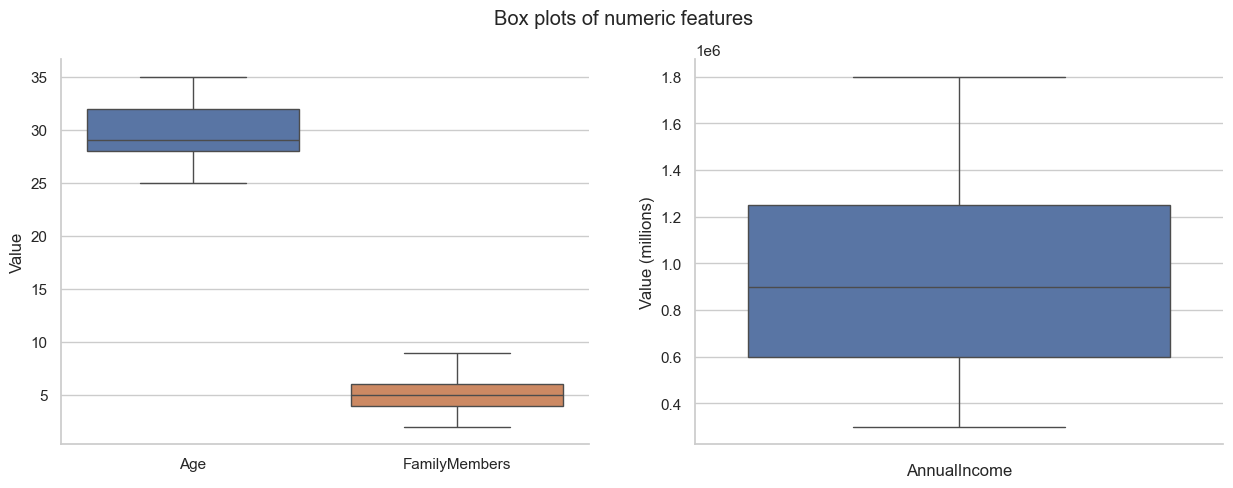

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(df[['Age', 'FamilyMembers']], ax=ax1)
sns.boxplot(df['AnnualIncome'], ax=ax2)
plt.suptitle('Box plots of numeric features')
ax1.set_ylabel('Value')
ax2.set_ylabel('Value (millions)')
ax2.set_xlabel('AnnualIncome');

No outliers seem to be present. Just in case we will pass it through the function which filters based on 1.5IQR threshold.\
The range of numbers in numeric features also seem reasonable and nothing seems to indicate erroneaus data.

In [8]:
find_outliers(df)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


### Category exploration

Next we want to count the amount of categories for our categorical features and make sure we understand them well:

In [9]:
print('Unique categorical classes:')
print('\n')
for column in df.columns:
    if column not in ('Age', 'FamilyMembers', 'AnnualIncome'):
        print(df[column].unique())
        print('\n')

Unique categorical classes:


['Government Sector' 'Private Sector/Self Employed']


['Yes' 'No']


[1 0]


['No' 'Yes']


['No' 'Yes']


[0 1]




**All** of the categorical features contain binary categories even the **Employment Type** which was thought to be multiclass.

## Numeric variable exploration

## Distributions

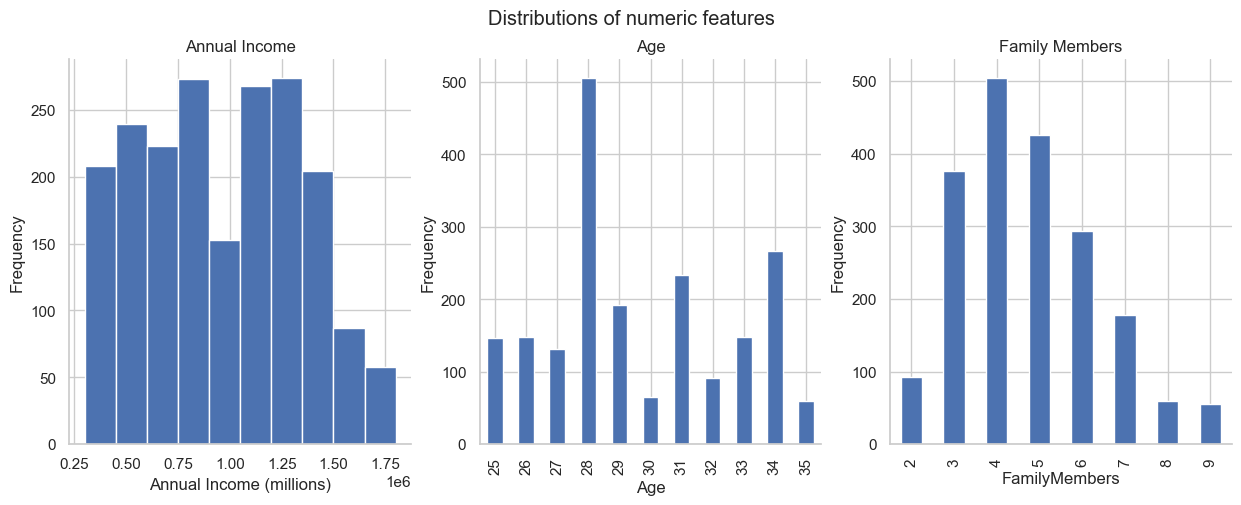

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))
df['AnnualIncome'].plot(kind='hist', title='Annual Income', ax=ax1)
df['Age'].value_counts().sort_index().plot(kind='bar', title='Age', ax=ax2)
df['FamilyMembers'].value_counts().sort_index().plot(kind='bar', title='Family Members', ax=ax3)

ax1.set_xlabel('Annual Income (millions)')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')
plt.suptitle('Distributions of numeric features');

**Income**:
- The income distribution for this sample doesn't quite follow the usual right-skewed shape that comes for income distributions.

**Age**:
- 28 year-olds are by far the most common group in this sample.

**Family Members**:
- Sample entities least commonly have **2**, **8** or **9** family members.

## Intercorrelation of numeric features

It seems reasonable to expect that age, family member count and income have some sort of relationships between each other.\
Let's explore this:

In [11]:
cols = ['AnnualIncome', 'Age', 'FamilyMembers']

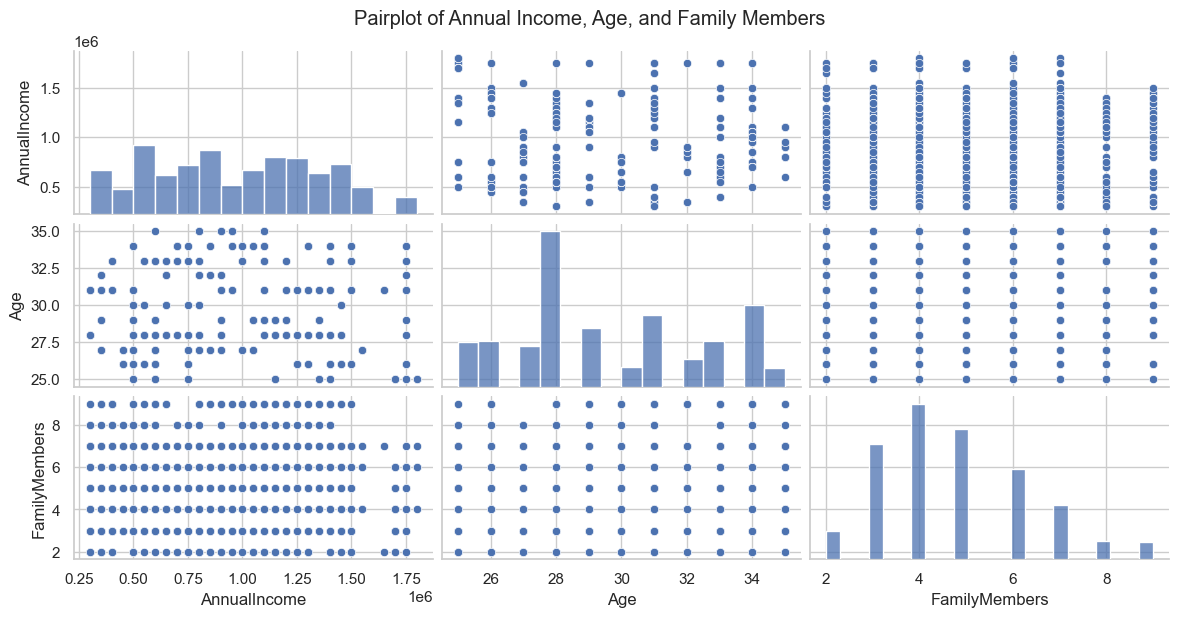

In [12]:
sns.pairplot(df[cols], kind='scatter', height=2, aspect=2)
plt.suptitle('Pairplot of Annual Income, Age, and Family Members', y=1.02);

Summary with correlation:

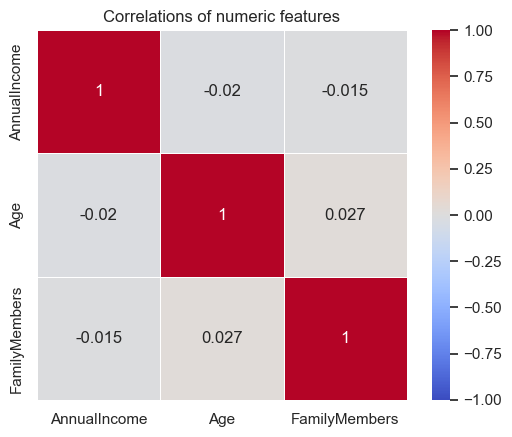

In [13]:
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5)
plt.title('Correlations of numeric features');

There seems to be very little relationship between numeric features.

## Relationship to the target variable

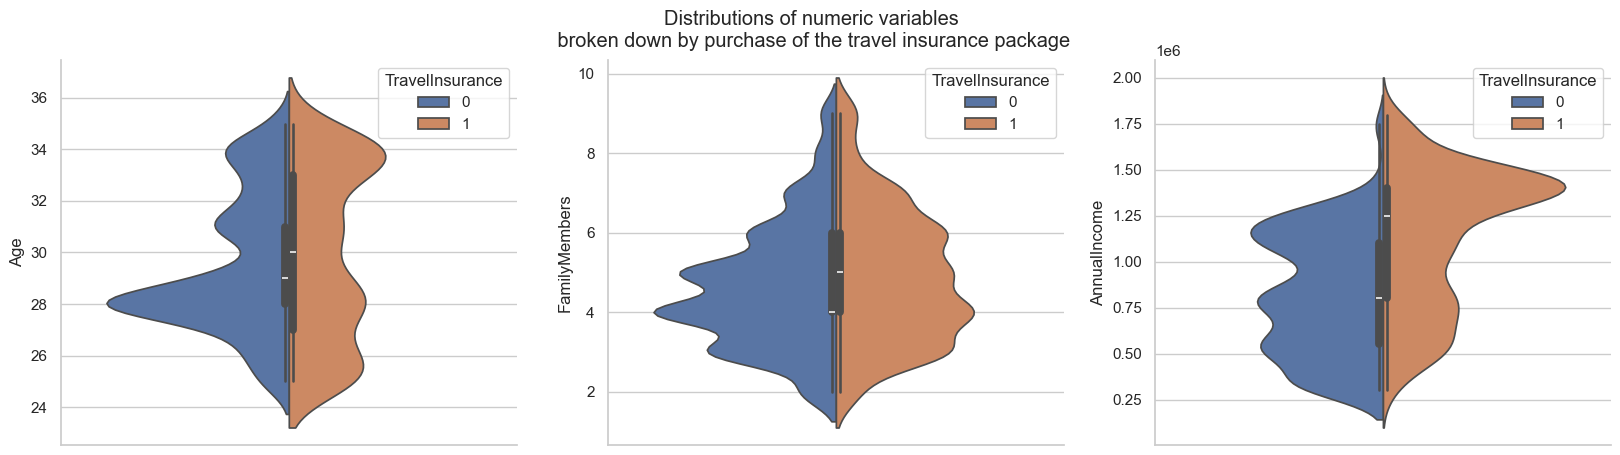

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
sns.violinplot(data=df, hue='TravelInsurance', y='Age', split=True, ax=ax1, common_norm=True)
sns.violinplot(data=df, hue='TravelInsurance', y='FamilyMembers', split=True, ax=ax2, common_norm=True)
sns.violinplot(data=df, hue='TravelInsurance', y='AnnualIncome', split=True, ax=ax3, common_norm=True)
plt.suptitle('Distributions of numeric variables\n broken down by purchase of the travel insurance package');

A swarm plot for a more granular look:

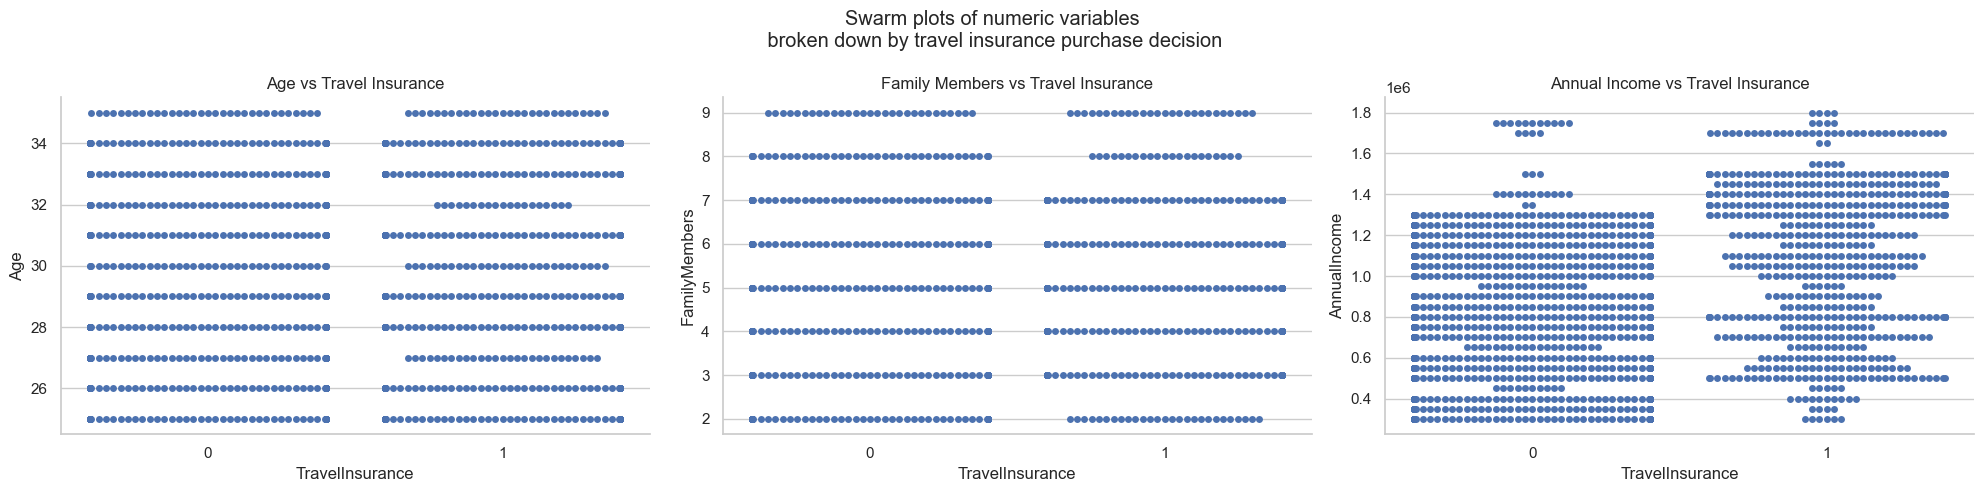

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

sns.swarmplot(data=df, x='TravelInsurance', y='Age', ax=ax1)
sns.swarmplot(data=df, x='TravelInsurance', y='FamilyMembers', ax=ax2)
sns.swarmplot(data=df, x='TravelInsurance', y='AnnualIncome', ax=ax3)

ax1.set_title('Age vs Travel Insurance')
ax2.set_title('Family Members vs Travel Insurance')
ax3.set_title('Annual Income vs Travel Insurance')
plt.suptitle('Swarm plots of numeric variables\n broken down by travel insurance purchase decision')
plt.tight_layout();

**Annual Income**:
- We see that sample probability that a person will purchase insurance increases significantly after income threshold of around 1.3 million was passed.

**Family Members**:
- The distributions for family member count split on our target variable are not drastically different. Though it does seem that family member count would slightly correlate with our target.

**Age:**
- Overall, no strong regular pattern in the distributions. We notice that most buyers of the package were around 34. On the other hand, we also notice that younger people (below 28) also tend to purchase the package more often than not. This seems to suggest that there would be stronger variables in play for explaining the variance.

## Distribution of categorical variables

### Target variable

One of the most obvious questions are, how is the target variable distributed?

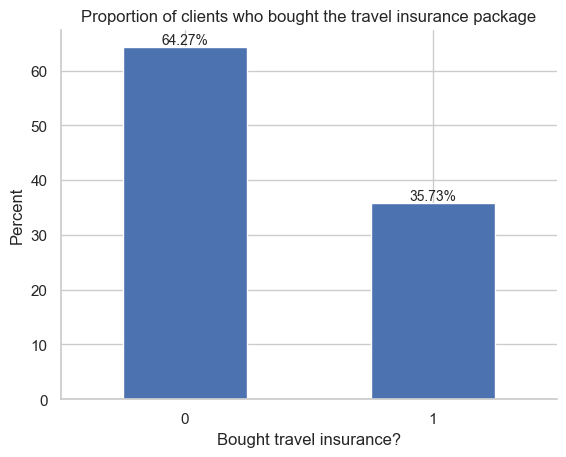

In [16]:
ax = (df['TravelInsurance']
      .value_counts(normalize=True)
      .mul(100)
      .plot(kind='bar', rot=0,
      title='Proportion of clients who bought the travel insurance package',
           ylabel='Percent',
           xlabel='Bought travel insurance?')
     )
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%');

Over a third of the sample bought the package.

## Distribution of other categorical variables

In [17]:
cat_cols = ['Employment Type',
            'GraduateOrNot',
            'ChronicDiseases',
            'FrequentFlyer',
            'EverTravelledAbroad']

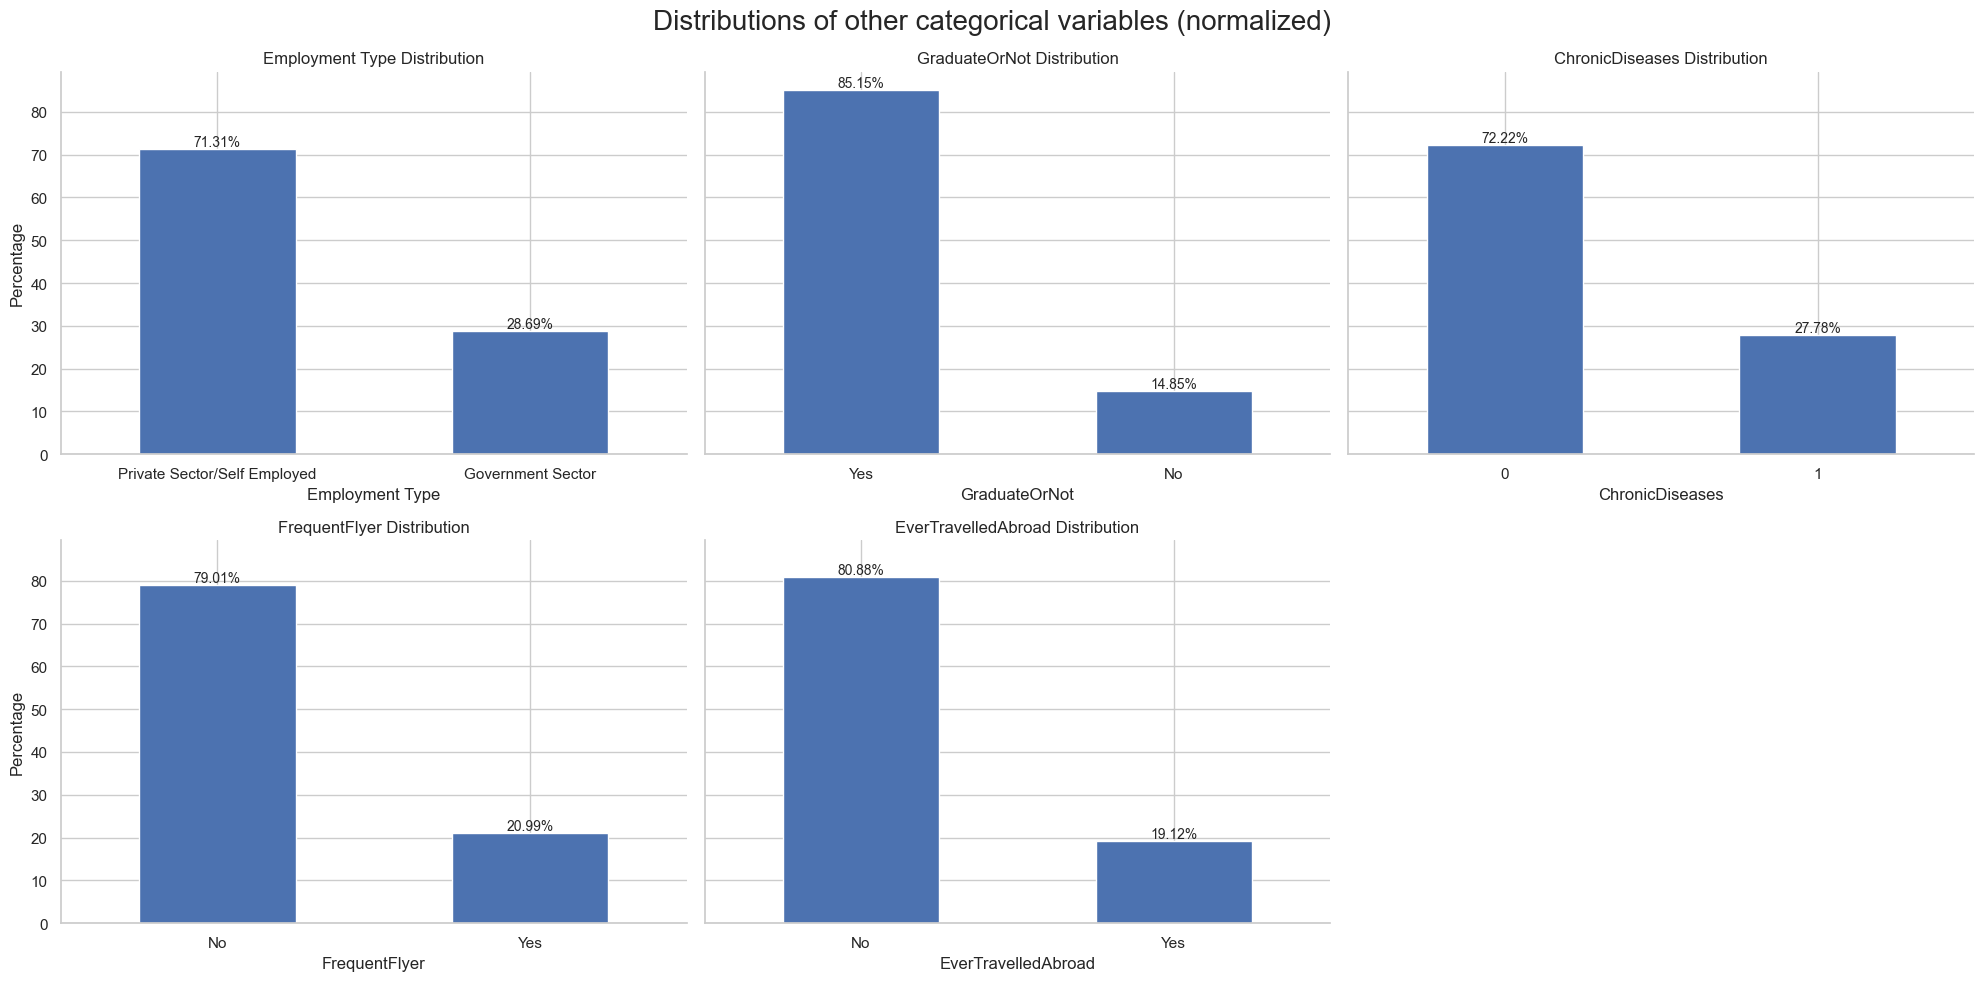

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(20,10), sharey=True)
axs_flat = axs.flatten()
for ax, col in zip(axs_flat, cat_cols):
    (df[col]
     .value_counts(normalize=True)
     .mul(100)
     .plot(kind='bar', ax=ax, rot=0)
    )
    ax.set_title(f'{col} Distribution')
    ax.set_ylabel('Percentage')
    ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f%%')

for ax in axs_flat:
    if not ax.has_data():
        ax.set_visible(False)

plt.suptitle('Distributions of other categorical variables (normalized)', fontsize=20)
plt.tight_layout()

- Interestingly, a very large amount of clients in the sample suffer from chronic conditions.
- Most of the clients work in the private sector.
- Most of the clients are college graduates.
- Only a fraction of clients are frequent flyers.
- Only a fraction of clients ever traveled abroad.

## Categorical values and the target

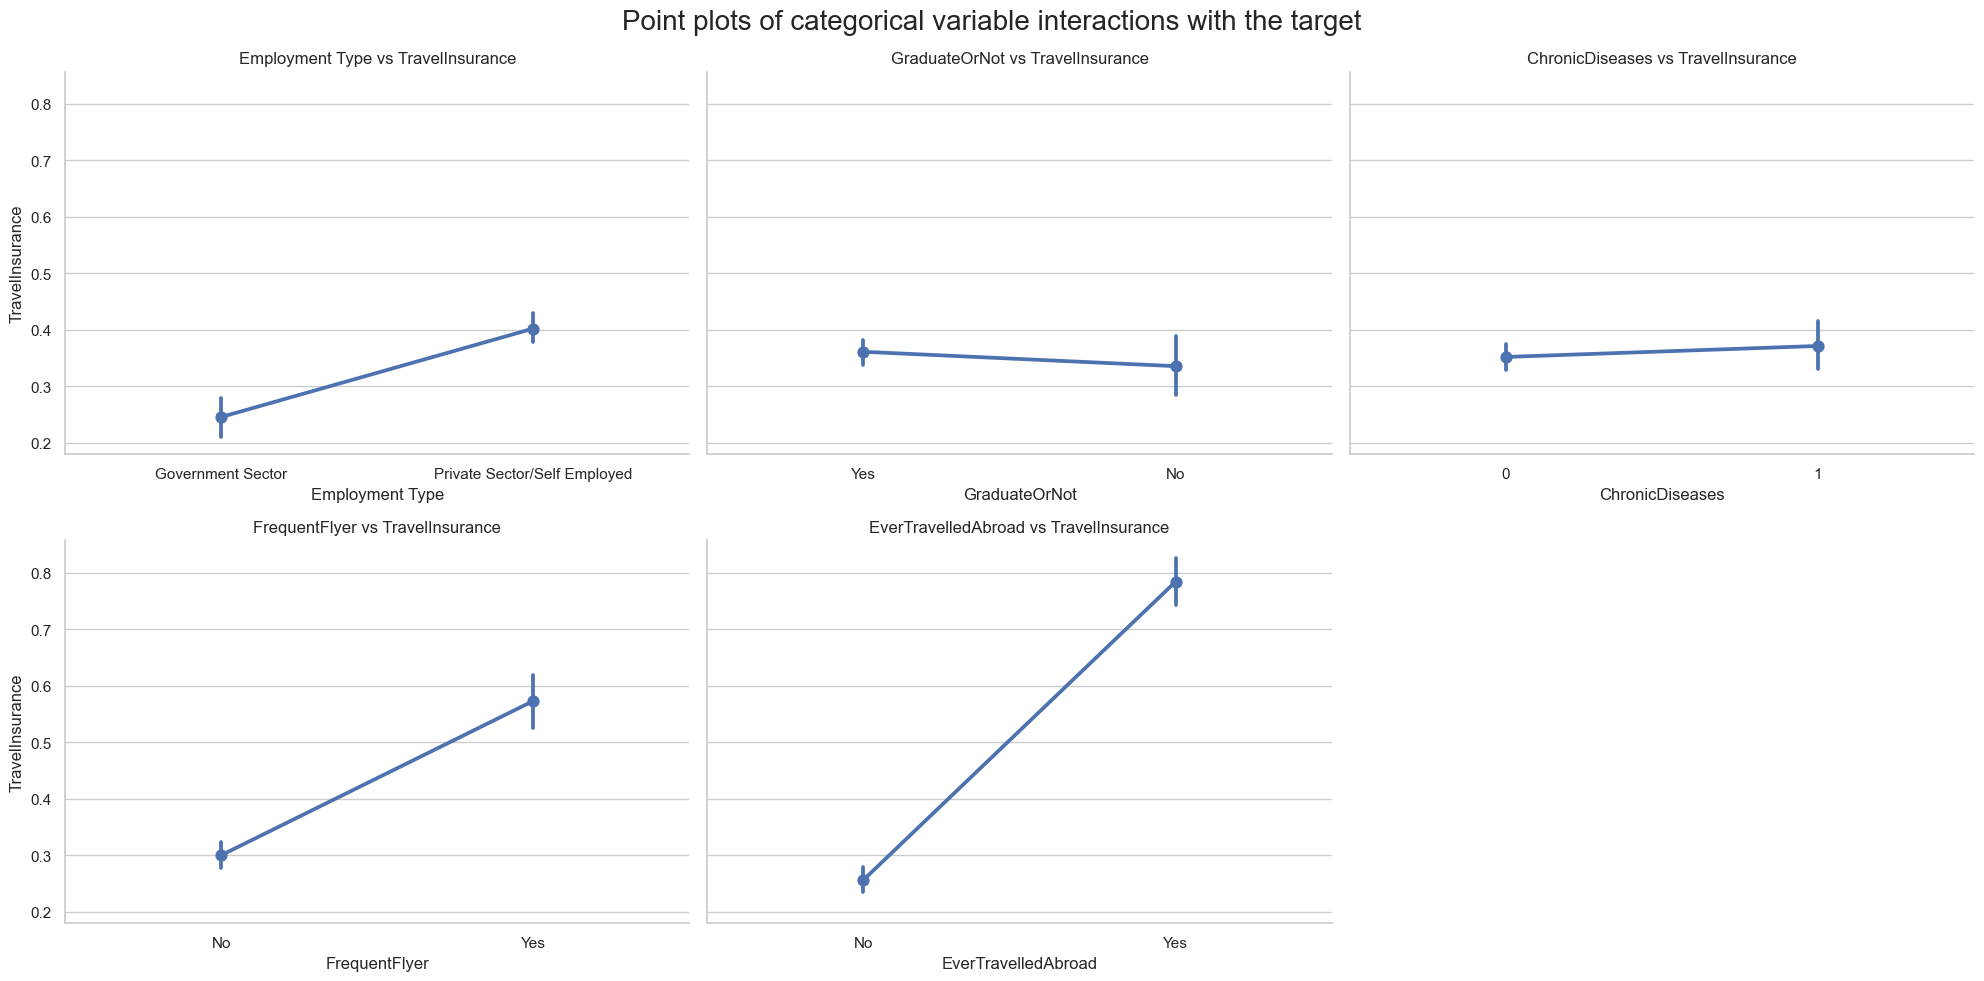

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
axs_flat = axs.flatten()

for ax, col in zip(axs_flat, cat_cols):
    sns.pointplot(data=df, x=col, y='TravelInsurance', ax=ax)
    ax.set_title(f'{col} vs TravelInsurance')
    ax.set_xlabel(col)
    ax.set_ylabel('TravelInsurance')

for ax in axs_flat:
    if not ax.has_data():
        ax.set_visible(False)

plt.suptitle('Point plots of categorical variable interactions with the target', fontsize=20)
plt.tight_layout()

- Seemingly, the strongest predictors are given by the two features that encode the frequency of traveling.
- Non government workers tend to purchase travel insurance more often.
- There seems to be very little association beetween having a chronic disease and purchasing travel insurance.
- College graduates seem to be only slightly more likely to purchase the travel insurance package.

## Multiple interactions



Now that we see the general picture of the data, we want to dive deeper into interactions between certain features.

### With annual income

#### Employment Type and AnnualIncome ➡️ TravelInsurance:

Binning income:

In [20]:
df['IncomeBinned'] = pd.cut(df['AnnualIncome'], bins=4)

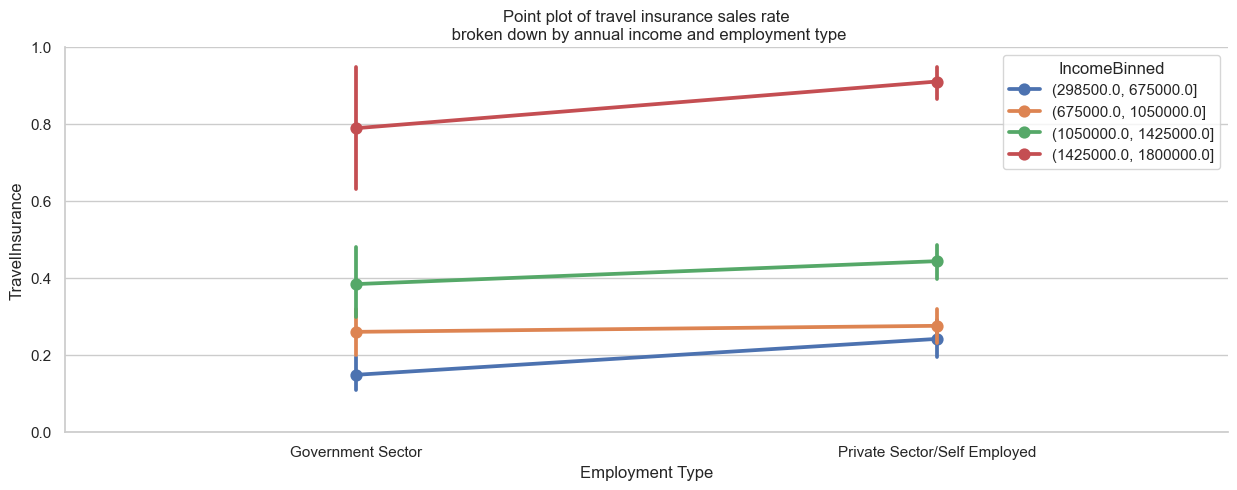

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='Employment Type', y='TravelInsurance', hue='IncomeBinned', ax=ax)
ax.set_title('Point plot of travel insurance sales rate\n broken down by annual income and employment type')
ax.set_ylim(0,1);

- We see that private sector workers seem to be more likely to get travel insurance compared to their income-bin counterparts who do government work.

Let's just make sure the results are not skewed by arbitrary binning.\
We will compare mean salaries of each bin broken down by employment type:

In [22]:
(df
 .groupby(['IncomeBinned', 'Employment Type'])
 ['AnnualIncome']
 .agg(['mean', 'std', 'count'])
)

mean  \
IncomeBinned           Employment Type                              
(298500.0, 675000.0]   Government Sector             4.168440e+05   
                       Private Sector/Self Employed  5.296928e+05   
(675000.0, 1050000.0]  Government Sector             8.593939e+05   
                       Private Sector/Self Employed  8.526256e+05   
(1050000.0, 1425000.0] Government Sector             1.200962e+06   
                       Private Sector/Self Employed  1.257372e+06   
(1425000.0, 1800000.0] Government Sector             1.536842e+06   
                       Private Sector/Self Employed  1.567834e+06   

                                                               std  count  
IncomeBinned           Employment Type                                     
(298500.0, 675000.0]   Government Sector             114087.609695    282  
                       Private Sector/Self Employed   70143.501514    293  
(675000.0, 1050000.0]  Government Sector             100999.257240    165  
                       Private Sector/Self Employed  121954.718250    438  
(1050000.0, 1425000.0] Government Sector              86456.894594    104  
                       Private Sector/Self Employed  106700.228240    529  
(1425000.0, 1800000.0] Government Sector             115279.979546     19  
                       Private Sector/Self Employed  111086.236260    157

The means for the first bin happened to be quite different (by over 100k), therefore, it's unclear how fair it is to compare these two groups. The other bins seem to be on point.

#### FrequentFlyer and AnnualIncome ➡️ TravelInsurance:

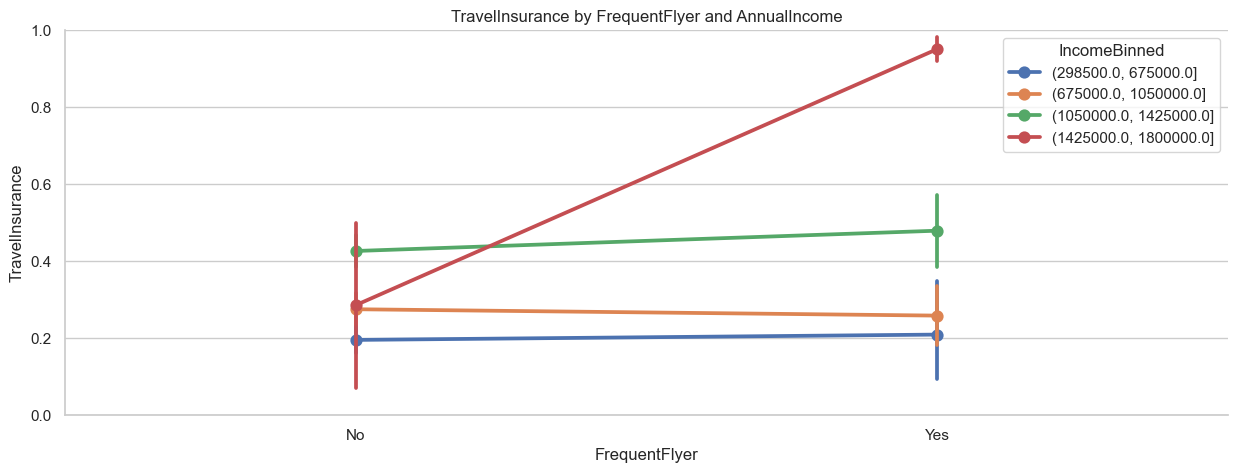

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='FrequentFlyer', y='TravelInsurance', hue='IncomeBinned', ax=ax)
ax.set_title('TravelInsurance by FrequentFlyer and AnnualIncome')
ax.set_ylim(0,1);

- We see that for the highest income bin, flight history was essentially decisive.
- The the difference for frequently and infrequently flying customers seems to be very small when it comes to customers with lower annual salary range.

#### EverTravelledAbroad and Annual Income ➡️ TravelInsurance:

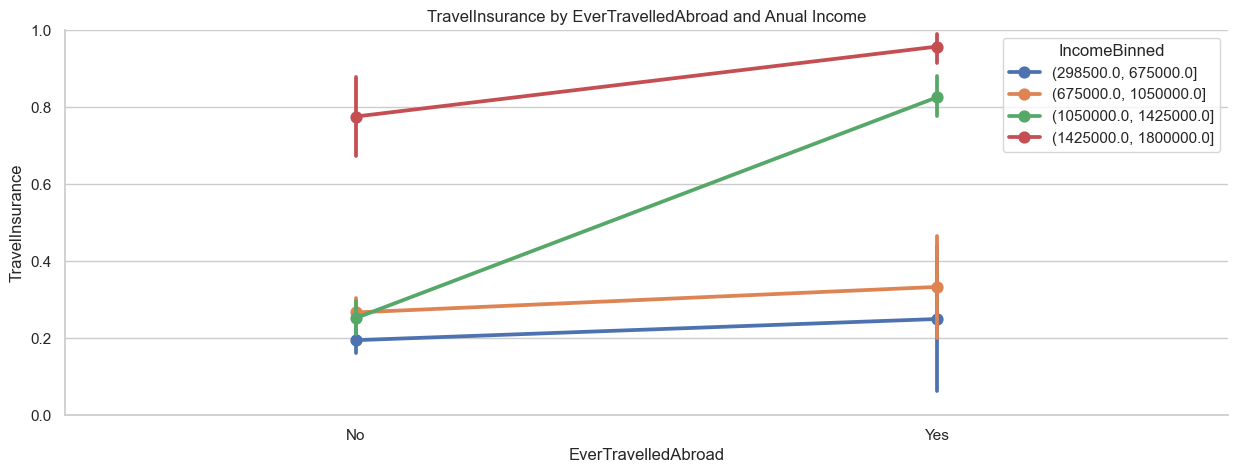

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='EverTravelledAbroad', y='TravelInsurance', hue='IncomeBinned', ax=ax)
ax.set_title('TravelInsurance by EverTravelledAbroad and Anual Income')
ax.set_ylim(0,1);

- In this case if the annual income is between around 1 to 1.5 million the probability of customer buying the insurance package seemingly goes up dramatically, given the customer ever travelled abroad.
- Though not quite as dramatically, this also holds for the richest bin.

### With age

#### Age, AnnualIncome ➡️ TravelInsurance

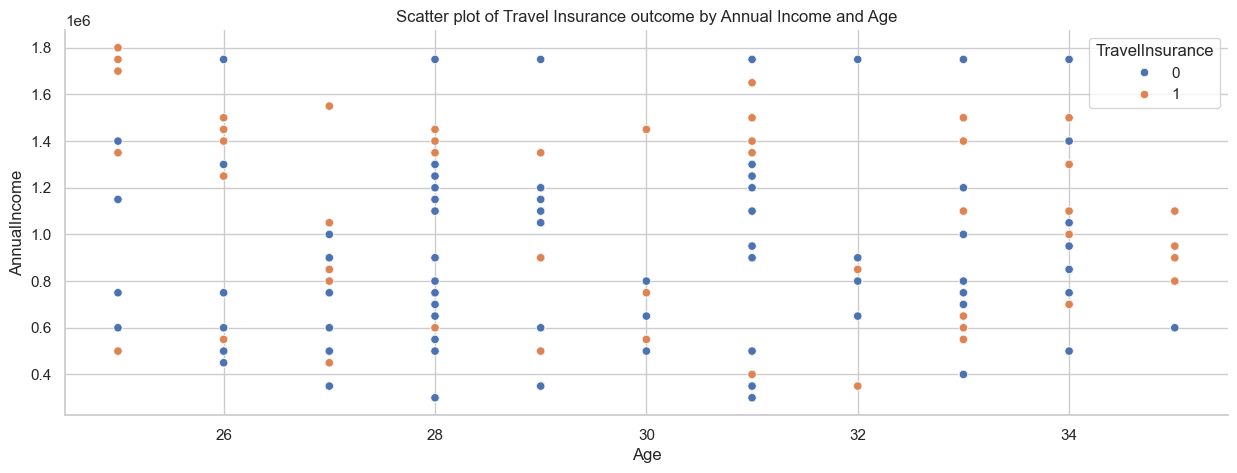

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(df, x='Age', y='AnnualIncome', hue='TravelInsurance', ax=ax)
ax.set_title('Scatter plot of Travel Insurance outcome by Annual Income and Age');

It does seem like for the mid AnnualIncome range (.8 to 1.3 million) there might be some pattern:

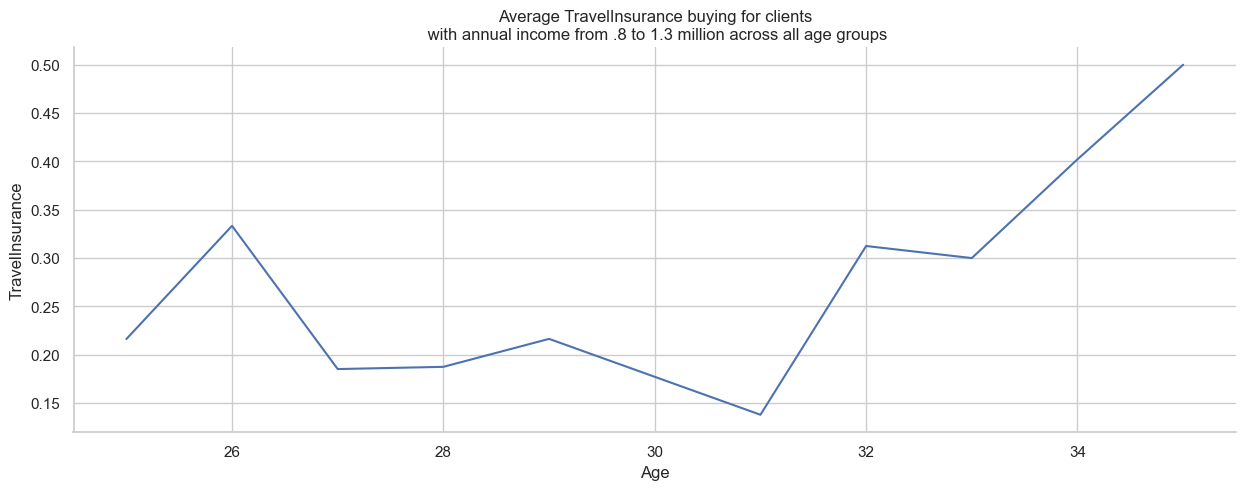

In [26]:
(df[(df['AnnualIncome'] < 1.3E6) & (df['AnnualIncome'] > .8E6)]
 .groupby('Age')
 ['TravelInsurance']
 .mean()
 .plot(ylabel='TravelInsurance', figsize=(15,5),
      title='Average TravelInsurance buying for clients\n with annual income from .8 to 1.3 million across all age groups')
);

- It seems that after Age of around 32 we see an increase of TravelInsurance purchasing for clients whose Annual income is from 0.8 to 1.3 million, however **it's unclear how much of it is due to noise** since the sample size ends up being very small.

#### Age, Employment Type ➡️ TravelInsurance

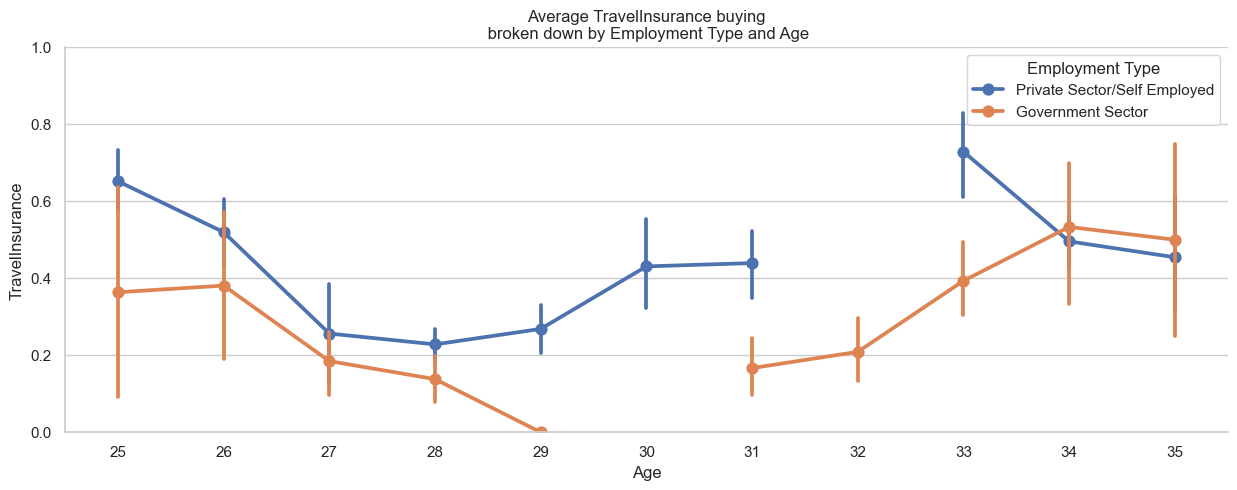

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='Age', y='TravelInsurance', hue='Employment Type', ax=ax)
ax.set_title('Average TravelInsurance buying\n broken down by Employment Type and Age')
ax.set_ylim(0,1);

- Except for the 34 and 35 years olds it seems private sector workers are consistently more likely to purchase travel insurance. Though, even for 34 and 35 year olds the confidence intervals are wide.
- There are no entries for government sector for age 30.
- There are no entries for private sector for age 32.

#### Age, FrequentFlyer ➡️ TravelInsurance

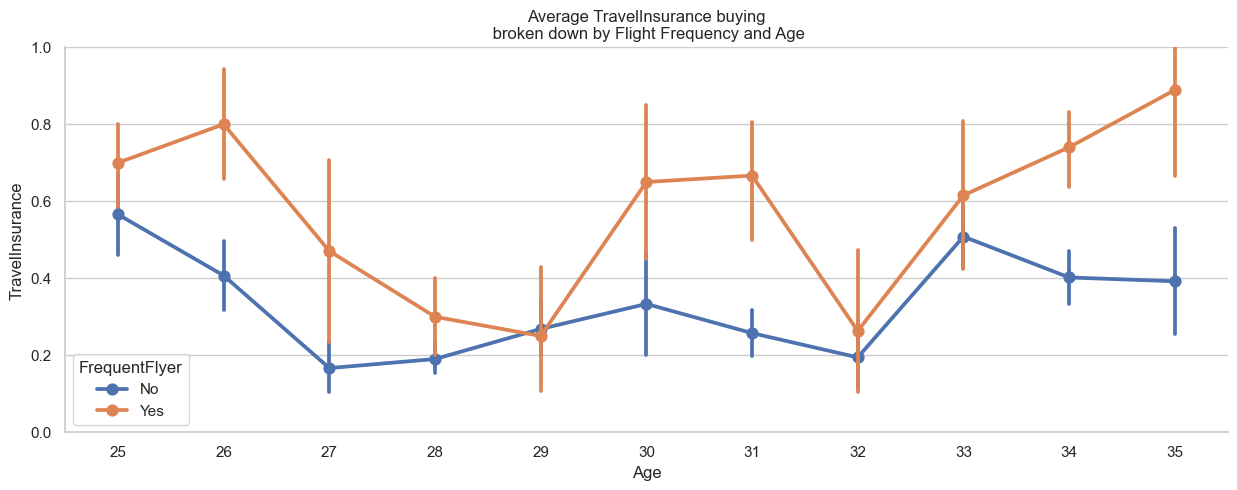

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='Age', y='TravelInsurance', hue='FrequentFlyer', ax=ax)
ax.set_title('Average TravelInsurance buying\n broken down by Flight Frequency and Age')
ax.set_ylim(0,1);

- It seems that for nearly all of the age groups having a frequent flying history increases the probability of travel insurance purchase. Though, even for frequent flyers aged 29 there is a wide population proportion confidence interval.

#### Age, EverTravelledAbroad ➡️ TravelInsurance

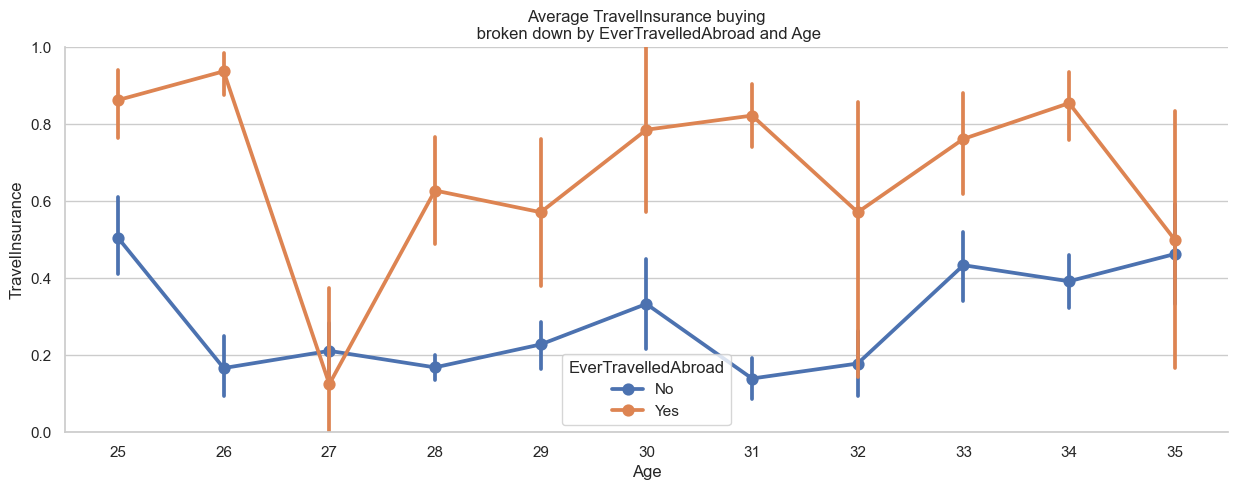

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=df, x='Age', y='TravelInsurance', hue='EverTravelledAbroad', ax=ax)
ax.set_title('Average TravelInsurance buying\n broken down by EverTravelledAbroad and Age')
ax.set_ylim(0,1);

- It seems that for nearly all of the age groups having traveled abroad results in higher probability of buying the travel insurance package.

# Inference

During the analysis, we closely examined the relationship between various variables and the target. We will continue this examination in a more statistically rigorous manner using hypothesis testing.

## Testing categorical variables

We will first test for categorical variable population association with the target.\
For this we will use the $\chi^2$ test which is specified as:

$$
H_0: \text{There is no significant association between the categorical variables.}
$$

$$
\alpha = 0.05
$$

### Assumptions

Sample sizes:

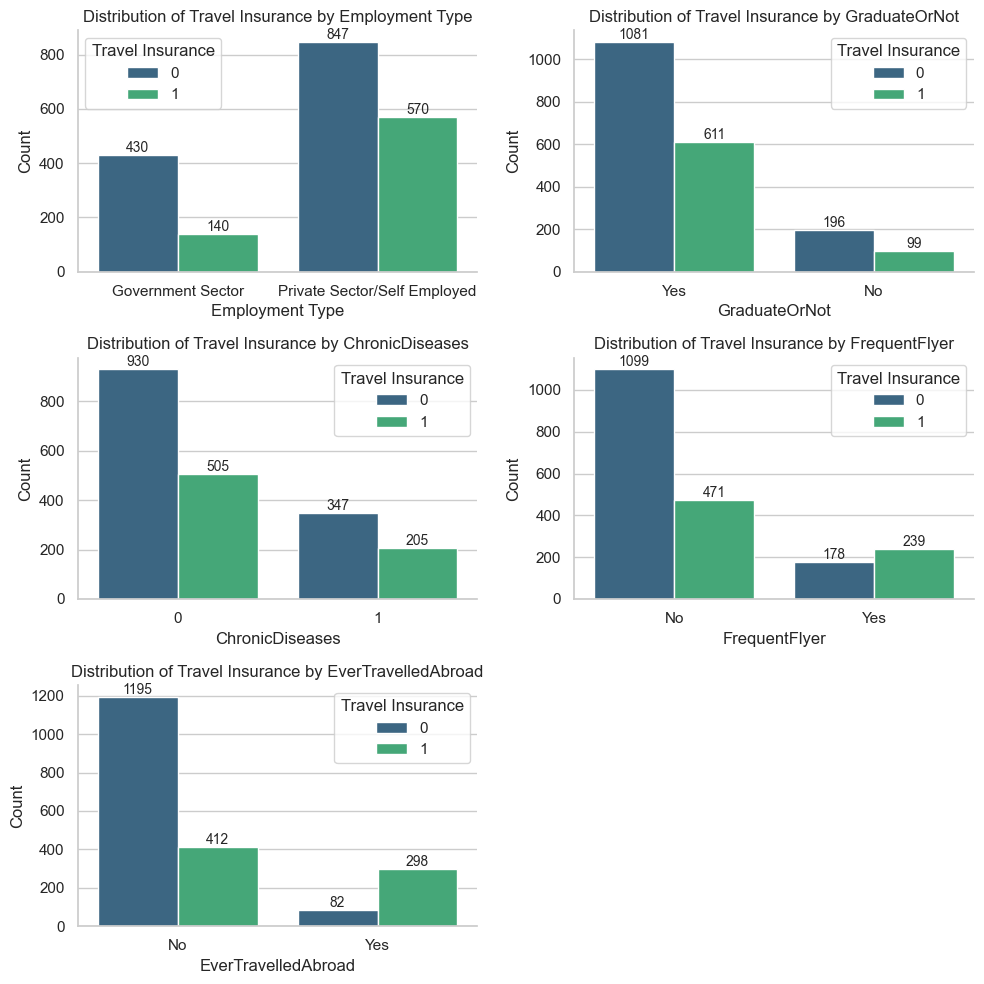

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
axs_flat = axs.flatten()
for ax, feature in zip(axs_flat, cat_cols):
    sns.countplot(x=feature, hue='TravelInsurance', data=df, palette='viridis', ax=ax)
    ax.set_title(f'Distribution of Travel Insurance by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Travel Insurance')
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.bar_label(ax.containers[1], fontsize=10)
    
for ax in axs_flat:
    if not ax.has_data():
        ax.set_visible(False)
        
plt.tight_layout()

- Random Sample ❓
- Independence of Observations ✅
- Sample Size ✅
- Categorical Data ✅

### Performing the $\chi^2$ test:

Since we will be performing multiple tests we want to control for Type 1 errors. We will use Bonferroni adjustment for that purpose.

In [31]:
from scipy.stats import chi2_contingency

thresh_adj = 0.05 / 8 # Bonferroni correction to control for Type 1 errors (p value is divided by the total number of tests performed)

print('\n')
for feature in cat_cols:
    chi2, p, dof, expected = chi2_contingency(
        pd.crosstab(df['TravelInsurance'], df[feature]))
    print(f'p_value: {p}')
    if p < thresh_adj:
        print(f'✅ We REJECT the H0 for feature: {feature}')
    else:
        print(f'❌ We DON\'T REJECT the H0 for feature: {feature}')
    print('__________________________________________________________')
    print('\n')



p_value: 6.208106601512192e-11
✅ We REJECT the H0 for feature: Employment Type
__________________________________________________________


p_value: 0.4364833842842336
❌ We DON'T REJECT the H0 for feature: GraduateOrNot
__________________________________________________________


p_value: 0.4481165216392011
❌ We DON'T REJECT the H0 for feature: ChronicDiseases
__________________________________________________________


p_value: 7.92436041506454e-25
✅ We REJECT the H0 for feature: FrequentFlyer
__________________________________________________________


p_value: 1.4134505859999571e-82
✅ We REJECT the H0 for feature: EverTravelledAbroad
__________________________________________________________




Given our sample and p value it seems that:
- Employment Type, FrequentFlyer and EverTravelledAbroad carry a statistically significat relationship to the target.
- GraduateOrNot and ChronicDiseases seemingly do not carry a statistically significant relationship to the target.

## Testing numeric variables

Now we will proceed with numeric variables. Normally we would use the two independent group T test for this purpose, however, in the analysis we saw that the distributions of our numeric samples are not normal and 'messy' in general. Because of this we opt for a non-parametric test.\
We will use Mann-Whitney U test which is specified as: 

$$H_0: \text{The distributions of the two groups are equal.}$$
$$
\alpha = 0.05
$$

### Assumptions

- Radom Sample ❓
- Independence ✅
- Ordinal or Continuous Data ✅
- Distribution Shape ✅
- Sample Sizes ✅

### Performing Mann-Whitney U test

In [32]:
from scipy.stats import mannwhitneyu
print('\n')
for feature in cols:
    
    group1 = df[df['TravelInsurance'] == 0][feature]
    group2 = df[df['TravelInsurance'] == 1][feature]

    u_stat, p = mannwhitneyu(group1, group2)
    print(f'p-value = {p}')
    if p < thresh_adj:
        print(f'✅ We REJECT the H0 for feature: {feature}')
    else:
        print(f'❌ We DON\'T REJECT the H0 for feature: {feature}')
    print('__________________________________________________________')
    print('\n')



p-value = 3.0201010454885667e-70
✅ We REJECT the H0 for feature: AnnualIncome
__________________________________________________________


p-value = 0.030678780881604334
❌ We DON'T REJECT the H0 for feature: Age
__________________________________________________________


p-value = 0.0008301993194480645
✅ We REJECT the H0 for feature: FamilyMembers
__________________________________________________________




Given the sample and the p value we see that:
- AnnaulIncome and FamilyMembers carry a statistically significat relationship to the target.
- Age does not seem to carry a statistically significat relationship to the target.

# Modeling

## Business purpose and metric

One compeling business argument for modeling 'TravelInsurance' would be to provide sales people with information on which customers to target or prioritize for direct outreach.\
In this case we need some degree of precision since we don't want to waste a salesman time contacting irrelevant leads. On the other hand we don't want the threshold to be so strict that excludes many potential buyers.\
The tradeoff between precision and recall is given by F1 score, therefore we will optimize for this metric.

## Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TravelInsurance', 'IncomeBinned'], axis=1),
                                                    df['TravelInsurance'], test_size=0.2, random_state=42)

In [34]:
X_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1271,25,Private Sector/Self Employed,Yes,500000,4,1,No,No
1805,29,Private Sector/Self Employed,Yes,1200000,4,0,No,No
365,25,Private Sector/Self Employed,No,1700000,3,0,Yes,No
1007,34,Private Sector/Self Employed,Yes,1000000,6,0,No,No
1232,31,Government Sector,No,350000,4,1,No,No


## Multicollinearity

In the analysis before we saw that numeric variables were very weakly correlated with each other.

## Logistic Regression

### Building pipelines

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from pprint import pprint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

- We will scale all numeric features with a standard scaler-
- One-hot encode the 'Employment Type' since it doesn't represent any ordinal logic.
- The rest of categorical features will be encoded with the ordinal encoder since they follow a yes-no format.
- Pass through 'ChronicDiseases' since this variable is already formatted appropriately for our purposes.

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'AnnualIncome', 'FamilyMembers']), 
        ('cat_oh', OneHotEncoder(drop='if_binary'), ['Employment Type']),
        ('cat_ord', OrdinalEncoder(), ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])
    ], remainder='passthrough')

logistic_pipeline = Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression(class_weight='balanced'))])

Hyper parameter search:

In [38]:
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

param_dist = {
    'clf__C': stats.uniform(0.01, 100),
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['liblinear', 'saga']
}

logistic_pipeline_search = RandomizedSearchCV(logistic_pipeline,
                           param_distributions=param_dist,
                           n_iter=1000,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

logistic_pipeline_search.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              LogisticRegression(class_weight='balanced'))]),
                   n_iter=1000,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1329ae7d0>,
                                        'clf__penalty': ['l2', 'l1'],
                                        'clf__solver': ['liblinear', 'saga']},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

Analyzing search results:

In [78]:
pd.DataFrame(logistic_pipeline_search.cv_results_).sort_values('rank_test_f1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__solver,params,split0_test_accuracy,split1_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
933,0.013327,0.000067,0.006913,0.000082,4.327374,l1,saga,"{'clf__C': 4.327373579701167, 'clf__penalty': ...",0.751572,0.726415,...,0.020961,1,0.651982,0.629787,0.591928,0.663636,0.605263,0.628519,0.027074,1
913,0.013547,0.000148,0.006963,0.000113,4.205122,l1,saga,"{'clf__C': 4.205122343163627, 'clf__penalty': ...",0.751572,0.726415,...,0.020961,1,0.651982,0.629787,0.591928,0.663636,0.605263,0.628519,0.027074,1
890,0.013644,0.000355,0.007041,0.000200,3.852635,l1,saga,"{'clf__C': 3.8526348962324994, 'clf__penalty':...",0.751572,0.726415,...,0.020961,1,0.651982,0.629787,0.591928,0.663636,0.605263,0.628519,0.027074,1
711,0.013597,0.000468,0.006882,0.000047,4.167286,l1,saga,"{'clf__C': 4.1672859050392095, 'clf__penalty':...",0.751572,0.726415,...,0.020961,1,0.651982,0.629787,0.591928,0.663636,0.605263,0.628519,0.027074,1
644,0.013847,0.000230,0.007020,0.000137,3.330311,l1,saga,"{'clf__C': 3.3303108791366562, 'clf__penalty':...",0.751572,0.726415,...,0.020961,1,0.651982,0.629787,0.591928,0.663636,0.605263,0.628519,0.027074,1


- We see that we have very similar C values for all top results. 
- The top result gives us average F1 score of 62.
- There is quite a bit of variance across folds but it's unclear wether it's due to the sample size being small or the model overfitting. Though, simple linear regression shouldn't overfit like this.

In [40]:
pd.DataFrame(logistic_pipeline_search.cv_results_)['std_test_f1'].agg(['min', 'max'])

min    0.021278
max    0.027074
Name: std_test_f1, dtype: float64

So our top result has the highest standard deviation across the folds, however the volatility doesn't seem to be that much bigger than that of the lowest one. We also have a relatively small sample size (around 1400), therefore, some amount of variance across the folds is expected.

Inspecting the model:

In [41]:
accuracy_logistic = logistic_pipeline_search.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_logistic:.2f}')
print('\n')
pprint(classification_report(y_test, logistic_pipeline_search.predict(X_test)))

The test accuracy score of the best model is 0.61


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.78      0.81      0.79       257\n'
 '           1       0.62      0.59      0.61       141\n'
 '\n'
 '    accuracy                           0.73       398\n'
 '   macro avg       0.70      0.70      0.70       398\n'
 'weighted avg       0.73      0.73      0.73       398\n')


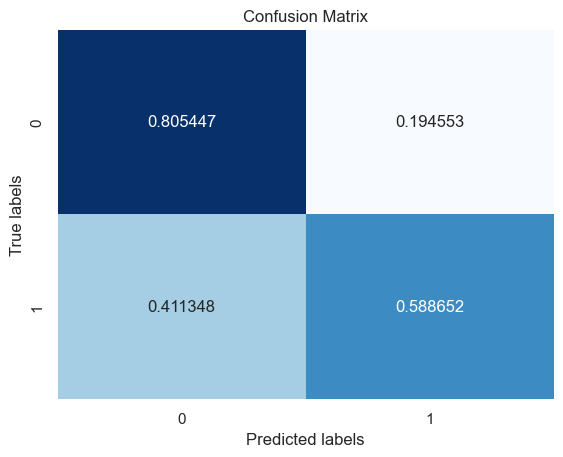

In [42]:
conf_matrix = confusion_matrix(y_test, logistic_pipeline_search.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

While the performance for classifying negative instances is not bad the performance for positive instances is not at all satisfactory. It seems that logistic regression model is not expressive enough.

Attempting to improve the model:

### Trying Polynomial Features

In [43]:
from sklearn.preprocessing import PolynomialFeatures

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False))])

preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Age', 'AnnualIncome', 'FamilyMembers']), 
        ('cat_oh', OneHotEncoder(drop='if_binary'), ['Employment Type']),
        ('cat_ord', OrdinalEncoder(), ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])
    ], remainder='passthrough')

logistic_pipeline_2 = Pipeline([('preprocessor', preprocessor_2), ('clf', LogisticRegression(class_weight='balanced'))])

param_dist_2 = {
    'clf__C': stats.uniform(0.01, 100),
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['liblinear', 'saga'],
    'preprocessor__num__poly__degree': [2, 3, 5]
}

logistic_pipeline_search_2 = RandomizedSearchCV(logistic_pipeline_2,
                           param_distributions=param_dist_2,
                           n_iter=1000,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

logistic_pipeline_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(include_bias=False))]),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateO...
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              LogisticRegression(class_weight='balanced'))]),
                   n_iter=1000,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13320ed70>,
                                        'clf__penalty': ['l2', 'l1'],
                                        'clf__solver': ['liblinear', 'saga'],
                                        'preprocessor__num__poly__degree': [2,
                                                                            3,
                                                                            5]},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

We see that the best f1 score is given by 5th degree polynomial features with relatively low regularization strenght.

In [79]:
(pd.DataFrame(logistic_pipeline_search_2.cv_results_)
 .sort_values('rank_test_f1')
 .head()
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__solver,param_preprocessor__num__poly__degree,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
794,0.328612,0.048228,0.009983,0.001821,8.356408,l1,liblinear,5,"{'clf__C': 8.356408498938329, 'clf__penalty': ...",0.811321,...,0.031253,7,0.722222,0.660633,0.623853,0.695652,0.751131,0.690698,0.044817,1
249,0.288181,0.027434,0.008721,0.002099,8.798762,l1,liblinear,5,"{'clf__C': 8.798762454014387, 'clf__penalty': ...",0.811321,...,0.031253,7,0.722222,0.660633,0.623853,0.695652,0.751131,0.690698,0.044817,1
116,0.260968,0.032937,0.007685,0.000041,5.829360,l1,liblinear,5,"{'clf__C': 5.8293595508443605, 'clf__penalty':...",0.814465,...,0.031720,1,0.725581,0.660633,0.620370,0.695652,0.751131,0.690674,0.046354,3
617,0.264191,0.031118,0.007735,0.000067,6.320903,l1,liblinear,5,"{'clf__C': 6.3209033079150165, 'clf__penalty':...",0.814465,...,0.031720,1,0.725581,0.660633,0.620370,0.695652,0.751131,0.690674,0.046354,3
669,0.281543,0.035400,0.008260,0.000805,6.675204,l1,liblinear,5,"{'clf__C': 6.675204056068996, 'clf__penalty': ...",0.814465,...,0.031720,1,0.725581,0.660633,0.620370,0.695652,0.751131,0.690674,0.046354,3


We see quite usual deviation between folds, indicating that probably the model doesn't overfit.

In [45]:
accuracy_logistic = logistic_pipeline_search_2.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_logistic:.2f}')
print('\n')
pprint(classification_report(y_test, logistic_pipeline_search_2.predict(X_test)))

The test accuracy score of the best model is 0.66


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      0.86      0.83       257\n'
 '           1       0.70      0.62      0.66       141\n'
 '\n'
 '    accuracy                           0.77       398\n'
 '   macro avg       0.75      0.74      0.75       398\n'
 'weighted avg       0.77      0.77      0.77       398\n')


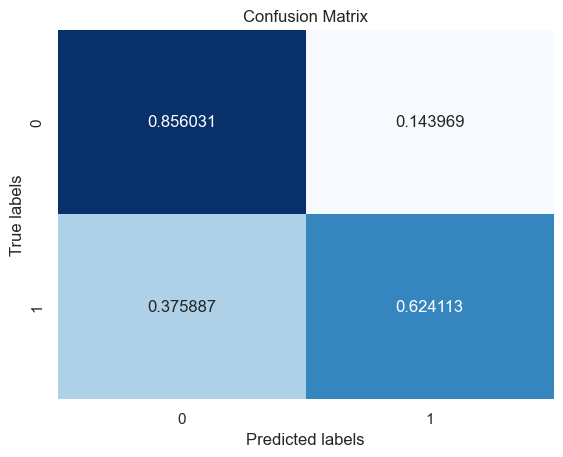

In [46]:
conf_matrix = confusion_matrix(y_test, logistic_pipeline_search_2.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

- It seems that we do have an improvement in f1 (micro-averaged F1 of 0.78) and less deviation between folds.
- However, we see that more than a third of positive labels were missclassified.

### Trying RBF kernel approximation with the Nystroem method

In [47]:
from sklearn.kernel_approximation import Nystroem

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('nystroem', Nystroem(random_state=42))])

    
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Age', 'AnnualIncome', 'FamilyMembers']), 
        ('cat_oh', OneHotEncoder(drop='if_binary'), ['Employment Type']),
        ('cat_ord', OrdinalEncoder(), ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])
    ], remainder='passthrough')

logistic_pipeline_3 = Pipeline([('preprocessor', preprocessor_3), ('clf', LogisticRegression(class_weight='balanced'))])


param_dist_3 = {
    'clf__C': stats.uniform(0.01, 100),
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['liblinear', 'saga'],
    'preprocessor__num__nystroem__n_components': [20, 50, 100],
    'preprocessor__num__nystroem__gamma': stats.uniform(0.01, 1)
}

logistic_pipeline_search_3 = RandomizedSearchCV(logistic_pipeline_3,
                           param_distributions=param_dist_3,
                           n_iter=1000,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

logistic_pipeline_search_3.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('nystroem',
                                                                                                Nystroem(random_state=42))]),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'Fr...
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1331442e0>,
                                        'clf__penalty': ['l2', 'l1'],
                                        'clf__solver': ['liblinear', 'saga'],
                                        'preprocessor__num__nystroem__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1331456c0>,
                                        'preprocessor__num__nystroem__n_components': [20,
                                                                                      50,
                                                                                      100]},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

In [48]:
pd.DataFrame(logistic_pipeline_search_3.cv_results_).sort_values('rank_test_f1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_clf__solver,param_preprocessor__num__nystroem__gamma,param_preprocessor__num__nystroem__n_components,params,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
799,0.218205,0.003815,0.009190,0.000156,5.200094,l1,saga,0.320085,100,"{'clf__C': 5.200094358730901, 'clf__penalty': ...",...,0.025249,1,0.732394,0.672897,0.625000,0.721951,0.700935,0.690635,0.038609,1
862,0.148824,0.026285,0.009592,0.001183,53.843194,l2,saga,0.378449,50,"{'clf__C': 53.84319432557134, 'clf__penalty': ...",...,0.026520,38,0.738739,0.666667,0.625592,0.715686,0.697248,0.688786,0.039429,2
63,0.178050,0.005511,0.008617,0.000085,19.534299,l2,saga,0.290772,100,"{'clf__C': 19.534298779804452, 'clf__penalty':...",...,0.024724,2,0.733333,0.666667,0.628019,0.715686,0.697674,0.688276,0.037330,3
472,0.261976,0.039033,0.011987,0.002611,7.472981,l1,saga,0.275387,100,"{'clf__C': 7.472981433708171, 'clf__penalty': ...",...,0.025978,6,0.726415,0.663594,0.625000,0.721951,0.703704,0.688133,0.038573,4
429,0.185860,0.014235,0.009377,0.001110,23.697056,l2,saga,0.284806,100,"{'clf__C': 23.69705589744821, 'clf__penalty': ...",...,0.023389,3,0.726415,0.666667,0.628019,0.715686,0.703704,0.688098,0.036171,5


In [49]:
accuracy_logistic = logistic_pipeline_search_3.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_logistic:.2f}')
print('\n')
pprint(classification_report(y_test, logistic_pipeline_search_3.predict(X_test)))

The test accuracy score of the best model is 0.67


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.80      0.89      0.85       257\n'
 '           1       0.75      0.60      0.67       141\n'
 '\n'
 '    accuracy                           0.79       398\n'
 '   macro avg       0.78      0.75      0.76       398\n'
 'weighted avg       0.79      0.79      0.78       398\n')


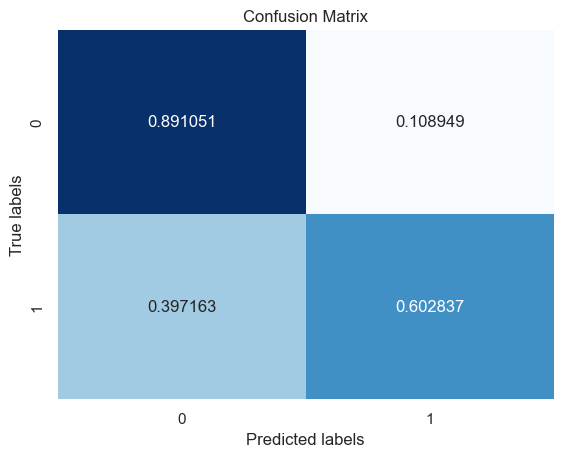

In [50]:
conf_matrix = confusion_matrix(y_test, logistic_pipeline_search_3.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

- We dont seem to get much improvement for introducing higher dimensional data into the model.
- We see larger standard variance among folds.

### ROC, PR curves and AUC's

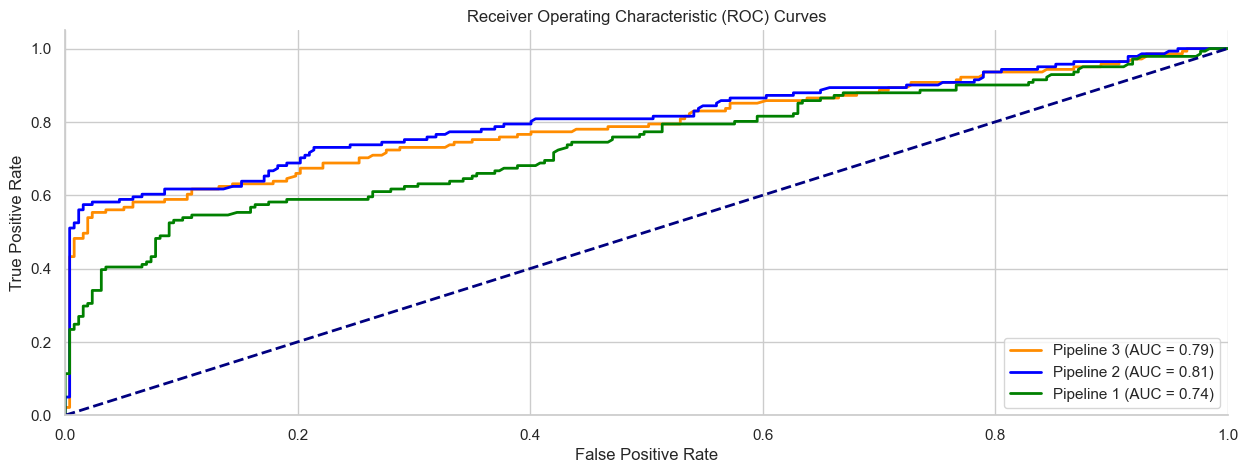

In [73]:
from sklearn.metrics import roc_curve, auc

y_prob_3 = logistic_pipeline_search_3.predict_proba(X_test)[:, 1]
y_prob_2 = logistic_pipeline_search_2.predict_proba(X_test)[:, 1]
y_prob = logistic_pipeline_search.predict_proba(X_test)[:, 1]

fpr_3, tpr_3, _ = roc_curve(y_test, y_prob_3)
roc_auc_3 = auc(fpr_3, tpr_3)

fpr_2, tpr_2, _ = roc_curve(y_test, y_prob_2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,5))
plt.plot(fpr_3, tpr_3, color='darkorange', lw=2, label=f'Pipeline 3 (AUC = {roc_auc_3:.2f})')
plt.plot(fpr_2, tpr_2, color='blue', lw=2, label=f'Pipeline 2 (AUC = {roc_auc_2:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Pipeline 1 (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right');

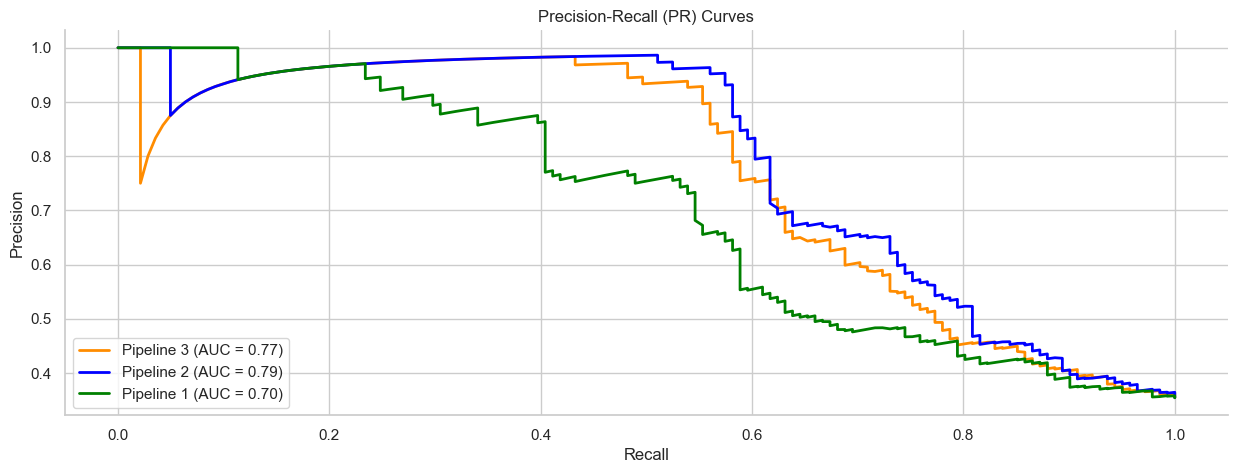

In [72]:
from sklearn.metrics import precision_recall_curve

precision_3, recall_3, _ = precision_recall_curve(y_test, y_prob_3)
pr_auc_3 = auc(recall_3, precision_3)

precision_2, recall_2, _ = precision_recall_curve(y_test, y_prob_2)
pr_auc_2 = auc(recall_2, precision_2)

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(15, 5))
plt.plot(recall_3, precision_3, color='darkorange', lw=2, label=f'Pipeline 3 (AUC = {pr_auc_3:.2f})')
plt.plot(recall_2, precision_2, color='blue', lw=2, label=f'Pipeline 2 (AUC = {pr_auc_2:.2f})')
plt.plot(recall, precision, color='green', lw=2, label=f'Pipeline 1 (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curves')
plt.legend(loc='lower left');

- 5th degree polynomial model seems to perform the best across various thresholds.

## SVM

In [243]:
from sklearn.svm import SVC
svm = Pipeline([('preprocessor', preprocessor),
('clf', SVC(random_state=42, class_weight='balanced'))])

svm_param_dist_1 = {
    'clf__C': stats.uniform(0.1, 1000),
    'clf__kernel': ['linear', 'poly'], 
    'clf__degree': [2, 3, 5, 7, 9],
    'clf__max_iter': [1000, 2000, 3000, 4000, 5000, 10000]
}

svm_search_1 = RandomizedSearchCV(svm,
                           param_distributions=svm_param_dist_1,
                           n_iter=1000,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

svm_search_1.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              SVC(class_weight='balanced',
                                                  random_state=42))]),
                   n_iter=1000,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13633dba0>,
                                        'clf__degree': [2, 3, 5, 7, 9],
                                        'clf__kernel': ['linear', 'poly'],
                                        'clf__max_iter': [1000, 2000, 3000,
                                                          4000, 5000, 10000]},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

In [226]:
svm_param_dist_2 = {
    'clf__C': stats.uniform(0.1, 1000),
    'clf__kernel': ['rbf'],
    'clf__gamma': stats.uniform(0.0001, 0.1),
    'clf__max_iter': [1000, 2000, 3000, 4000, 5000, 10000]
}

svm_search_2 = RandomizedSearchCV(svm,
                           param_distributions=svm_param_dist_2,
                           n_iter=500,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

svm_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              SVC(c...
                                                  random_state=42))]),
                   n_iter=500,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x137d67100>,
                                        'clf__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1381343d0>,
                                        'clf__kernel': ['rbf'],
                                        'clf__max_iter': [1000, 2000, 3000,
                                                          4000, 5000, 10000]},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

In [244]:
svm_1_params = pd.DataFrame(svm_search_1.cv_results_)
svm_2_params = pd.DataFrame(svm_search_2.cv_results_)

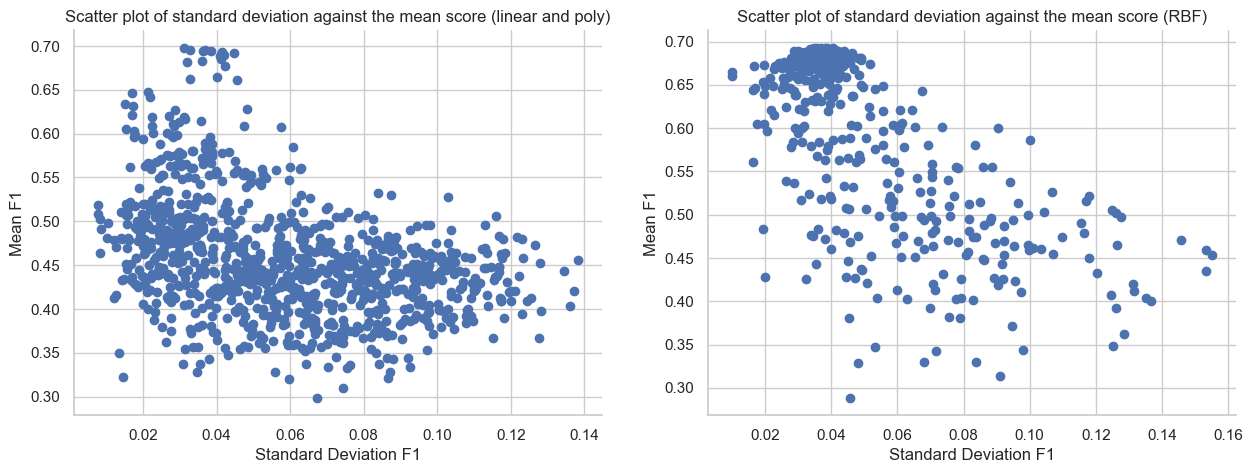

In [245]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.scatter(svm_1_params['std_test_f1'], svm_1_params['mean_test_f1'])
ax1.set_ylabel('Mean F1')
ax1.set_xlabel('Standard Deviation F1')
ax1.set_title('Scatter plot of standard deviation against the mean score (linear and poly)')

ax2.scatter(svm_2_params['std_test_f1'], svm_2_params['mean_test_f1'])
ax2.set_ylabel('Mean F1')
ax2.set_xlabel('Standard Deviation F1')
ax2.set_title('Scatter plot of standard deviation against the mean score (RBF)');

Seemingly the only viable solution is to use the default best parameter for the first search.

In [251]:
svm_search_1.best_params_

{'clf__C': np.float64(0.4325061204894064),
 'clf__degree': 5,
 'clf__kernel': 'poly',
 'clf__max_iter': 2000}

In [252]:
accuracy_svm = svm_search_1.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_rf:.2f}')
print('\n')
pprint(classification_report(y_test, svm_search_1.predict(X_test)))

The test accuracy score of the best model is 0.81


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.79      0.96      0.87       257\n'
 '           1       0.88      0.55      0.67       141\n'
 '\n'
 '    accuracy                           0.81       398\n'
 '   macro avg       0.83      0.75      0.77       398\n'
 'weighted avg       0.82      0.81      0.80       398\n')


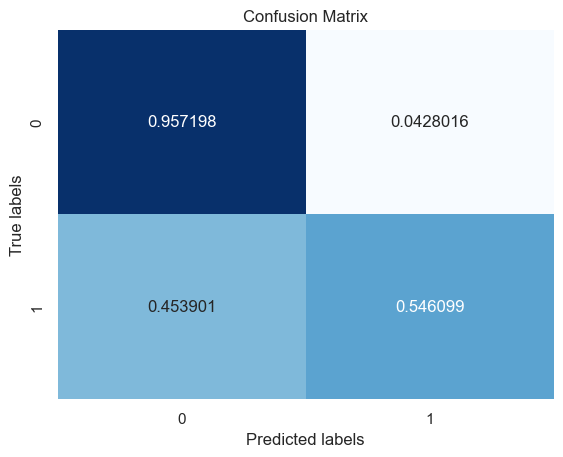

In [253]:
conf_matrix = confusion_matrix(y_test, svm_search_1.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

- Very poor recall for positive class

## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
from scipy.stats import randint

rf = Pipeline([('preprocessor', preprocessor),
('clf', RandomForestClassifier(class_weight='balanced', random_state=42))])

rf_param_dist = {
    'clf__n_estimators': randint(100, 500),  # Number of trees in the forest
    'clf__max_features': randint(1, X_train.shape[1]),  # Number of features to consider at every split
    'clf__max_depth': randint(2, 100),  # Maximum number of levels in tree
    'clf__min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'clf__min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
}

rf_search = RandomizedSearchCV(rf,
                           param_distributions=rf_param_dist,
                           n_iter=500,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              Rando...
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x135994670>,
                                        'clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x135995ba0>,
                                        'clf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13633dc60>},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

In [105]:
rf_cv_results = pd.DataFrame(rf_search.cv_results_).sort_values('rank_test_f1')

In [106]:
rf_cv_results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,params,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
447,0.584594,0.006707,0.028853,0.000711,6,4,8,13,420,"{'clf__max_depth': 6, 'clf__max_features': 4, ...",...,0.018379,1,0.761421,0.684492,0.673797,0.708995,0.756477,0.717036,0.036108,1


It seems as our top parameter has a lot of variability across cross-validation folds. We will attempt to find a better candidate.

In [107]:
rf_cv_results['std_test_f1'].agg(['min', 'max'])

min    0.016488
max    0.050580
Name: std_test_f1, dtype: float64

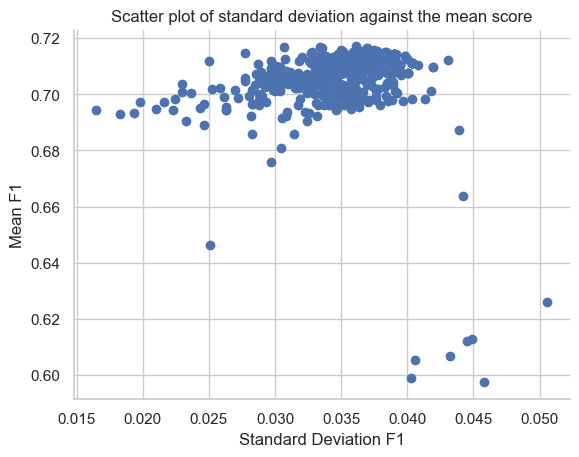

In [108]:
fig, ax = plt.subplots()
ax.scatter(rf_cv_results['std_test_f1'], rf_cv_results['mean_test_f1'])
ax.set_ylabel('Mean F1')
ax.set_xlabel('Standard Deviation F1')
ax.set_title('Scatter plot of standard deviation against the mean score');

We see a point with a good tradeoff between std and mean f1 at around .025 std.

In [133]:
optimal_parameters = (rf_cv_results
 [rf_cv_results['std_test_f1'] < 0.027]
 .sort_values('mean_test_f1', ascending=False)
 .head(1)
)
optimal_parameters

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,params,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
10,0.598858,0.006091,0.030362,0.002748,91,5,2,16,363,"{'clf__max_depth': 91, 'clf__max_features': 5,...",...,0.012086,317,0.747573,0.69697,0.680203,0.700508,0.7343,0.711911,0.025027,154


In [135]:
rf.set_params(**optimal_parameters.params.values[0])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers']),
                                                 ('cat_oh',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Employment Type']),
                                                 ('cat_ord', OrdinalEncoder(),
                                                  ['GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=91,
                                        max_features=5, min_samples_leaf=2,
                                        min_samples_split=16, n_estimators=363,
                                        random_state=42))])

In [138]:
accuracy_rf = rf.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_rf:.2f}')
print('\n')
pprint(classification_report(y_test, rf.predict(X_test)))

The test accuracy score of the best model is 0.84


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.82      0.96      0.88       257\n'
 '           1       0.90      0.60      0.72       141\n'
 '\n'
 '    accuracy                           0.84       398\n'
 '   macro avg       0.86      0.78      0.80       398\n'
 'weighted avg       0.85      0.84      0.83       398\n')


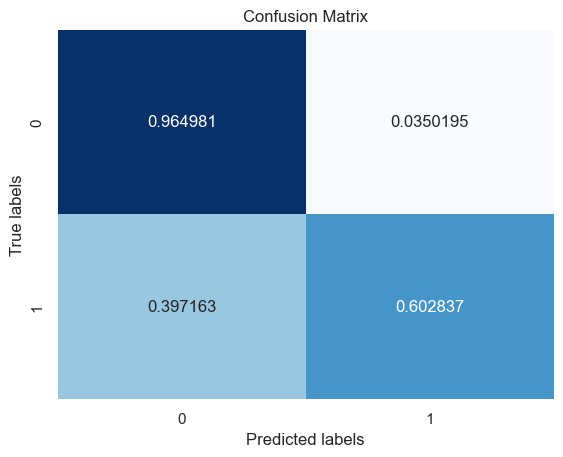

In [141]:
conf_matrix = confusion_matrix(y_test, rf.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

- We got better F1 score and substantially better precision for class 1 yet there is an obvious issue of recall.

#### Feature importances

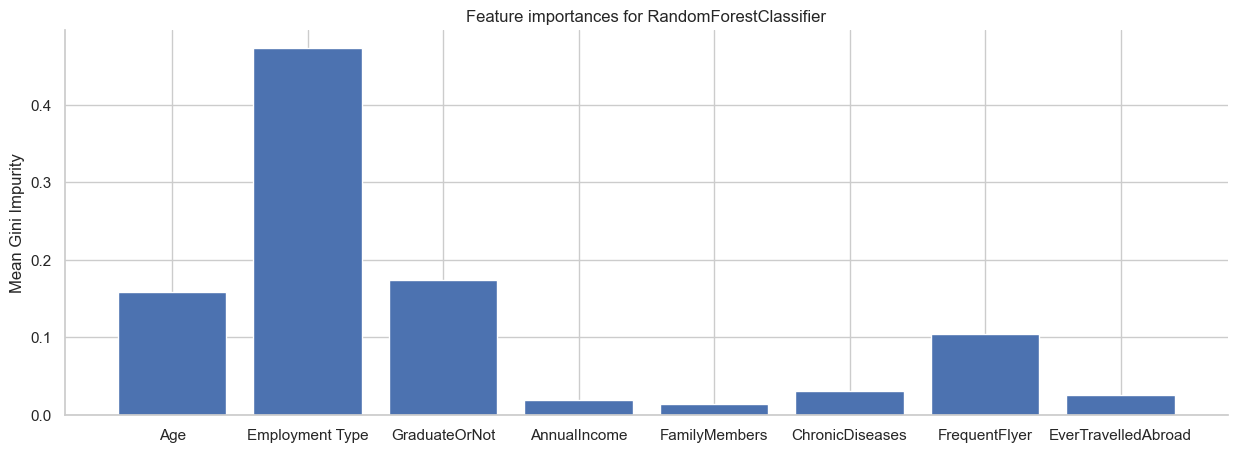

In [328]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(X_train.columns, rf.named_steps['clf'].feature_importances_)
ax.set_title('Feature importances for RandomForestClassifier')
ax.set_ylabel('Mean Gini Impurity');

- We get a result which are quite at odds with our analysis, we see that AnnualIncome, seemingly the most predictive feature actually doesn't help the model much at all.

## Gradient Boosting

In [155]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [160]:
gb = Pipeline([('preprocessor', preprocessor),
('clf', HistGradientBoostingClassifier(random_state=42, class_weight='balanced'))])

gb_param_dist = {
    'clf__learning_rate': stats.uniform(0.01, 0.15),
    'clf__max_iter': randint(100, 200),
    'clf__max_leaf_nodes': randint(20, 100),
    'clf__max_depth': randint(2, 20),
    'clf__min_samples_leaf': randint(2, 50),
    'clf__l2_regularization': stats.uniform(0.0, 1.0),
    'clf__max_bins': randint(100, 255)
}

gb_search = RandomizedSearchCV(gb,
                           param_distributions=gb_param_dist,
                           n_iter=500,
                           cv=5,
                           scoring=['accuracy', 'f1'],
                           verbose=1,
                           random_state=42,
                           refit='f1')

gb_search.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              HistG...
                                        'clf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x136da7550>,
                                        'clf__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x136da7280>,
                                        'clf__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1371077c0>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1371075b0>},
                   random_state=42, refit='f1', scoring=['accuracy', 'f1'],
                   verbose=1)

In [172]:
gb_cv_results = pd.DataFrame(gb_search.cv_results_)

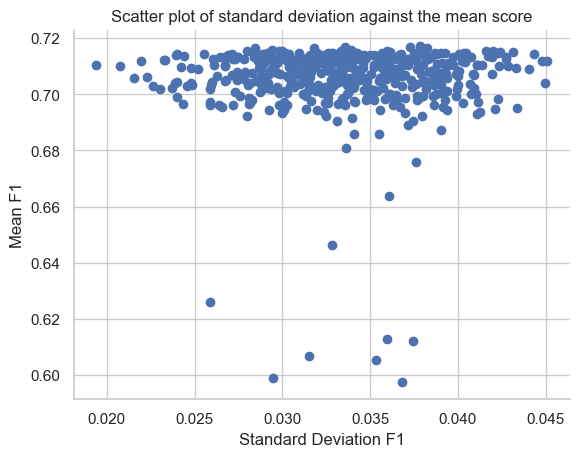

In [175]:
fig, ax = plt.subplots()
ax.scatter(gb_cv_results['std_test_f1'], rf_cv_results['mean_test_f1'])
ax.set_ylabel('Mean F1')
ax.set_xlabel('Standard Deviation F1')
ax.set_title('Scatter plot of standard deviation against the mean score');

We see that the leftmost point offers a very good F1 score per deviation trade-off.

In [178]:
gb_opt_params = gb_cv_results[gb_cv_results['std_test_f1'] < 0.02].params

In [181]:
gb.set_params(**gb_opt_params.values[0])
gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers']),
                                                 ('cat_oh',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Employment Type']),
                                                 ('cat_ord', OrdinalEncoder(),
                                                  ['GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad'])])),
                ('clf',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                l2_regularization=np.float64(0.22862516152492351),
                                                learning_rate=np.float64(0.14630519639040518),
                                                max_bins=181, max_depth=5,
                                                max_iter=101, max_leaf_nodes=97,
                                                min_samples_leaf=14,
                                                random_state=42))])

In [317]:
accuracy_gb = gb.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_gb:.2f}')
print('\n')
pprint(classification_report(y_test, gb.predict(X_test)))

The test accuracy score of the best model is 0.84


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      1.00      0.89       257\n'
 '           1       0.99      0.57      0.72       141\n'
 '\n'
 '    accuracy                           0.84       398\n'
 '   macro avg       0.90      0.78      0.81       398\n'
 'weighted avg       0.87      0.84      0.83       398\n')


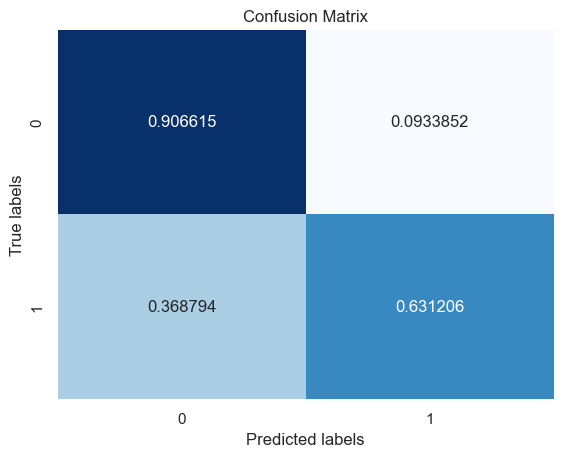

In [183]:
conf_matrix = confusion_matrix(y_test, gb.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

#### Further improvements

It is somewhat strange that a random forest performs same or even a little better than a boosted classifier.\
Since boosted algorhitms are more sensitive to hyperparameter tuning, we will try once more but with a weighted f1 metric.

In [261]:
gb_search_2 = RandomizedSearchCV(gb,
                           param_distributions=gb_param_dist,
                           n_iter=500,
                           cv=5,
                           scoring=['accuracy', 'f1_weighted'],
                           verbose=1,
                           random_state=42,
                           refit='f1_weighted')
gb_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'AnnualIncome',
                                                                                'FamilyMembers']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              HistG...
                                        'clf__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x136da7280>,
                                        'clf__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1371077c0>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1371075b0>},
                   random_state=42, refit='f1_weighted',
                   scoring=['accuracy', 'f1_weighted'], verbose=1)

In [264]:
pd.DataFrame(gb_search_2.cv_results_).sort_values('rank_test_f1_weighted').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__l2_regularization,param_clf__learning_rate,param_clf__max_bins,param_clf__max_depth,param_clf__max_iter,param_clf__max_leaf_nodes,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
490,0.081599,0.001498,0.009051,0.000228,0.038930,0.015403,244,3,140,87,...,0.020951,1,0.845791,0.788847,0.800869,0.822672,0.844007,0.820437,0.022734,1
361,0.065531,0.006571,0.009443,0.000938,0.533029,0.033693,111,3,106,99,...,0.022695,2,0.845791,0.788847,0.795028,0.822672,0.847025,0.819872,0.024482,2
195,0.102928,0.002673,0.009103,0.000126,0.991475,0.019228,144,4,155,59,...,0.020526,3,0.845791,0.791749,0.799672,0.816744,0.844607,0.819713,0.022326,3
220,0.063537,0.000866,0.009357,0.000625,0.142496,0.084833,185,2,173,59,...,0.021292,5,0.852875,0.794657,0.799672,0.807905,0.841598,0.819342,0.023439,4
93,0.129627,0.000852,0.009319,0.000965,0.268672,0.013328,217,4,149,31,...,0.019232,3,0.838639,0.788847,0.804680,0.819705,0.844007,0.819176,0.020619,5


it seems like we can just pick the top parameter since it's pretty stable across folds. It also maximizes both F1 and accuracy.

In [265]:
accuracy_rf = gb_search_2.score(X_test, y_test)
print(f'The test accuracy score of the best model is {accuracy_rf:.2f}')
print('\n')
pprint(classification_report(y_test, gb_search_2.predict(X_test)))

The test accuracy score of the best model is 0.83


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      1.00      0.89       257\n'
 '           1       0.99      0.57      0.72       141\n'
 '\n'
 '    accuracy                           0.84       398\n'
 '   macro avg       0.90      0.78      0.81       398\n'
 'weighted avg       0.87      0.84      0.83       398\n')


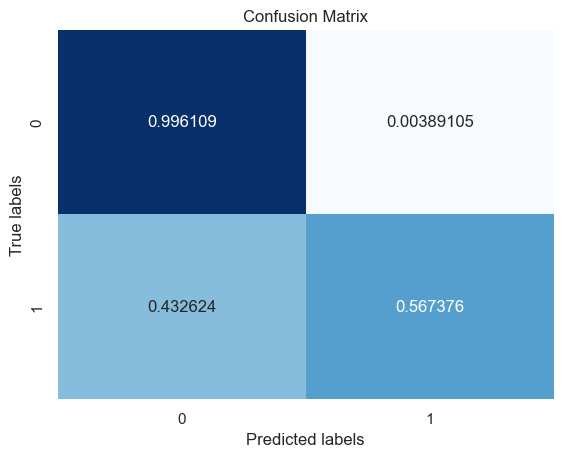

In [266]:
conf_matrix = confusion_matrix(y_test, gb_search_2.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

## Final model

For the final model we will stick with the HistGradientBoostingClassifier.

### Analyzing misspredicted labels

We will analyze the misspredictions on the training data.

In [297]:
boolean_mask = gb_search_2.predict(X_train) != y_train
analysis_data = X_train.copy()
analysis_data['Prediction_Status'] = 'correct'
analysis_data.loc[boolean_mask, 'Prediction_Status'] = 'incorrect'

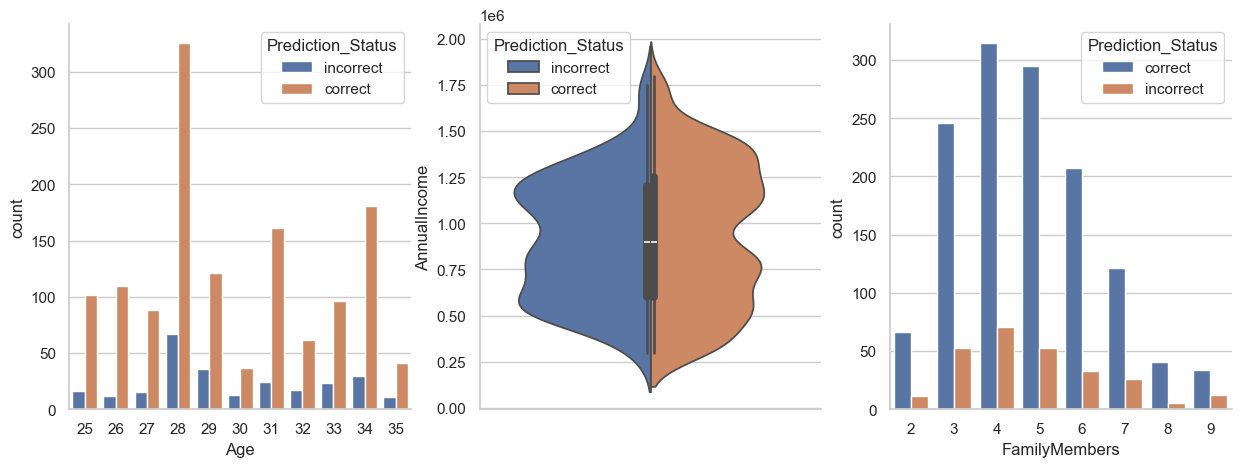

In [341]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(analysis_data, x='Age', hue='Prediction_Status', ax=ax1)
sns.violinplot(analysis_data, y='AnnualIncome', hue='Prediction_Status', split=True, common_norm=True, ax=ax2)
sns.countplot(analysis_data, x='FamilyMembers', hue='Prediction_Status', ax=ax3);

- We see that income ranges are have much more overlap here than in the initial analysis. This is especially strange since disposable income is expected to explain the variability of results well. Of course this data is split, which could change the distribution of it. On the other hand it might indicate that we should try to attempt to transform this feature. This is also corroborated by feature importances of the random forest model.

In [332]:
from sklearn.preprocessing import FunctionTransformer

preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', FunctionTransformer(), ['AnnualIncome']), 
        ('cat_oh', OneHotEncoder(drop='if_binary'), ['Employment Type']),
        ('cat_ord', OrdinalEncoder(), ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])
    ], remainder='passthrough')

pipeline_gb = Pipeline([('preprocessor', preprocessor_gb),
                        ('clf', HistGradientBoostingClassifier(random_state=42, class_weight='balanced'))])

gb_param_dist_2 = {
    'clf__learning_rate': stats.uniform(0.01, 0.15),
    'clf__max_iter': randint(100, 200),
    'clf__max_leaf_nodes': randint(20, 100),
    'clf__max_depth': randint(2, 20),
    'clf__min_samples_leaf': randint(2, 50),
    'clf__l2_regularization': stats.uniform(0.0, 1.0),
    'clf__max_bins': randint(100, 255),
    'preprocessor__num__func' : [np.log1p, np.sqrt, np.exp]
}

gb_search_2 = RandomizedSearchCV(pipeline_gb,
                           param_distributions=gb_param_dist_2,
                           n_iter=2000,
                           cv=5,
                           scoring=['accuracy', 'f1_weighted'],
                           verbose=1,
                           random_state=42,
                           refit='f1_weighted')

gb_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               FunctionTransformer(),
                                                                               ['AnnualIncome']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              HistGradientBoostingCl...
                                        'clf__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1395c4790>,
                                        'clf__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1395c5b70>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1395c68c0>,
                                        'preprocessor__num__func': [<ufunc 'log1p'>,
                                                                    <ufunc 'sqrt'>,
                                                                    <ufunc 'exp'>]},
                   random_state=42, refit='f1_weighted',
                   scoring=['accuracy', 'f1_weighted'], verbose=1)

In [339]:
pd.DataFrame(gb_search_2.cv_results_).sort_values('rank_test_f1_weighted')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__l2_regularization,param_clf__learning_rate,param_clf__max_bins,param_clf__max_depth,param_clf__max_iter,param_clf__max_leaf_nodes,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
915,0.096374,0.012514,0.009197,0.001662,0.143062,0.012102,204,4,101,40,...,0.019628,1,0.844638,0.795028,0.795905,0.822672,0.844007,0.820450,0.021880,1
349,0.072869,0.003975,0.010406,0.001121,0.271569,0.080935,204,2,171,57,...,0.020258,2,0.855372,0.793840,0.802597,0.813791,0.835602,0.820240,0.022450,2
1854,0.090581,0.003550,0.011625,0.001699,0.797240,0.055267,135,2,184,61,...,0.016022,3,0.846336,0.793840,0.808468,0.819705,0.832613,0.820193,0.018275,3
638,0.066848,0.003213,0.008433,0.000237,0.812474,0.059041,210,2,180,85,...,0.022103,4,0.849341,0.789631,0.799672,0.816744,0.844607,0.819999,0.023717,4
542,0.071456,0.001597,0.008458,0.000314,0.986729,0.050705,121,3,130,30,...,0.021105,13,0.849341,0.796205,0.793840,0.817482,0.841598,0.819693,0.022732,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,0.957674,0.106537,0.014500,0.000876,0.866608,0.129209,229,18,157,93,...,0.020498,1996,0.718948,0.751329,0.732960,0.719371,0.769486,0.738419,0.019512,1996
481,1.015924,0.108977,0.011811,0.000080,0.742881,0.120688,107,15,180,92,...,0.018485,1997,0.731439,0.748428,0.727653,0.715601,0.766562,0.737936,0.017756,1997
753,0.696978,0.017205,0.009763,0.000095,0.190337,0.147583,118,18,132,95,...,0.019769,1998,0.728102,0.760033,0.724753,0.714110,0.760713,0.737542,0.019207,1998
279,0.818710,0.078391,0.010720,0.000729,0.082172,0.155179,235,9,124,92,...,0.021999,1999,0.716043,0.757131,0.718020,0.716981,0.763637,0.734362,0.021355,1999


In [337]:
print(f'The test accuracy score of the best model is {gb_search_2.score(X_test, y_test):.2f}')
print('\n')
pprint(classification_report(y_test, gb_search_2.predict(X_test)))

The test accuracy score of the best model is 0.83


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      1.00      0.89       257\n'
 '           1       0.99      0.57      0.72       141\n'
 '\n'
 '    accuracy                           0.84       398\n'
 '   macro avg       0.90      0.78      0.81       398\n'
 'weighted avg       0.87      0.84      0.83       398\n')


We didn't seem to get any improvements from applying function transformations to annual income variable.

Another option to try is binning. Though it introduces some loss of information it also could help our model to capture numeric feature signal better.

In [340]:
from sklearn.preprocessing import KBinsDiscretizer

In [343]:
preprocessor_gb_2 = ColumnTransformer(
    transformers=[
        ('num', KBinsDiscretizer(encode='onehot'), ['AnnualIncome']), 
        ('cat_oh', OneHotEncoder(drop='if_binary'), ['Employment Type']),
        ('cat_ord', OrdinalEncoder(), ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])
    ], remainder='passthrough')

pipeline_gb_2 = Pipeline([('preprocessor', preprocessor_gb_2),
                        ('clf', HistGradientBoostingClassifier(random_state=42, class_weight='balanced'))])

gb_param_dist_3 = {
    'clf__learning_rate': stats.uniform(0.01, 0.15),
    'clf__max_iter': randint(100, 200),
    'clf__max_leaf_nodes': randint(20, 100),
    'clf__max_depth': randint(2, 20),
    'clf__min_samples_leaf': randint(2, 50),
    'clf__l2_regularization': stats.uniform(0.0, 1.0),
    'clf__max_bins': randint(100, 255),
    'preprocessor__num__n_bins' : [3, 4, 5]
    
}

gb_search_3 = RandomizedSearchCV(pipeline_gb_2,
                           param_distributions=gb_param_dist_3,
                           n_iter=2000,
                           cv=5,
                           scoring=['accuracy', 'f1_weighted'],
                           verbose=1,
                           random_state=42,
                           refit='f1_weighted')

gb_search_3.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               KBinsDiscretizer(),
                                                                               ['AnnualIncome']),
                                                                              ('cat_oh',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['Employment '
                                                                                'Type']),
                                                                              ('cat_ord',
                                                                               OrdinalEncoder(),
                                                                               ['GraduateOrNot',
                                                                                'FrequentFlyer',
                                                                                'EverTravelledAbroad'])])),
                                             ('clf',
                                              HistGradientBoostingClass...
                                        'clf__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138b4f370>,
                                        'clf__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138cf78e0>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138b6e200>,
                                        'preprocessor__num__n_bins': [3, 4, 5]},
                   random_state=42, refit='f1_weighted',
                   scoring=['accuracy', 'f1_weighted'], verbose=1)

In [347]:
pd.DataFrame(gb_search_3.cv_results_).sort_values('rank_test_f1_weighted').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__l2_regularization,param_clf__learning_rate,param_clf__max_bins,param_clf__max_depth,param_clf__max_iter,param_clf__max_leaf_nodes,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
1790,0.196026,0.006294,0.012219,0.000156,0.901387,0.023482,143,4,170,41,...,0.016650,1,0.836810,0.793294,0.803417,0.819705,0.839737,0.818592,0.018169,1
502,0.123474,0.007380,0.014229,0.005139,0.127386,0.052826,182,3,140,64,...,0.012743,3,0.836810,0.802044,0.801281,0.816744,0.830774,0.817531,0.014502,2
1042,0.097393,0.002026,0.008845,0.000069,0.508684,0.018207,199,4,108,95,...,0.014961,2,0.837358,0.803417,0.793840,0.816744,0.835602,0.817392,0.017208,3
739,0.142305,0.023328,0.014785,0.001971,0.043100,0.036864,168,3,154,99,...,0.018830,9,0.846861,0.801246,0.791749,0.810845,0.833195,0.816779,0.020383,4
1948,0.095673,0.019534,0.010739,0.000897,0.306059,0.042670,198,3,118,85,...,0.018415,4,0.839797,0.793294,0.793840,0.819705,0.836744,0.816676,0.020073,5


In [348]:
print(f'The test accuracy score of the best model is {gb_search_3.score(X_test, y_test):.2f}')
print('\n')
pprint(classification_report(y_test, gb_search_3.predict(X_test)))

The test accuracy score of the best model is 0.83


('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      0.98      0.89       257\n'
 '           1       0.94      0.59      0.72       141\n'
 '\n'
 '    accuracy                           0.84       398\n'
 '   macro avg       0.88      0.78      0.81       398\n'
 'weighted avg       0.86      0.84      0.83       398\n')


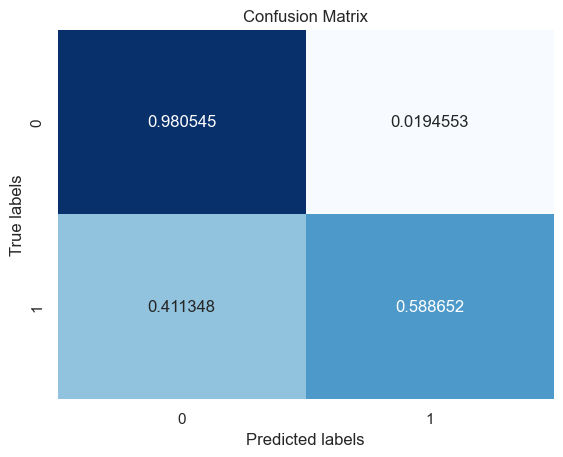

In [349]:
conf_matrix = confusion_matrix(y_test, gb_search_3.predict(X_test), normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Confusion Matrix');

Negligible improvement in ability to predict 1's.

# Considerations and Suggestions

- The finalized model should be evaluated with an additional hold-out set since the test set here was used for multiple models. In this case, this step wasn't done since the dataset was already small.
- Incorporation of domain knowledge would likely help in engineering better features.